# **Walmart Sales Forecast Analysis**

Bộ dữ liệu Walmart Sales Forecast được xây dựng nhằm mục đích dự báo doanh thu hàng tuần của các cửa hàng thuộc chuỗi bán lẻ Walmart. Đây là một bài toán quan trọng trong lĩnh vực bán lẻ, giúp các nhà quản lý có thể tối ưu hóa kho hàng, nhân sự và lập kế hoạch kinh doanh dựa trên các yếu tố tác động từ thị trường.

## Danh sách thành viên

- **Lê Chí Hoàng - 23520520**

- **Ngô Lê Nhật Hoàng - 23520526**

- **Nguyễn Hoàng Minh - 23520937**

- **Đặng Văn Vỹ - 23521825**

#**1. Giới thiệu bài toán**

## 1.1. Sơ lược về bộ dữ liệu

**1. Input và Output của bài toán**

- Input: Các yếu tố ảnh hưởng đến doanh thu, bao gồm thông tin về cửa hàng, thời gian, điều kiện thời tiết, CPI, tỷ lệ thất nghiệp, chương trình giảm giá...

- Output: Doanh thu hàng tuần của từng cửa hàng và từng phòng ban (`Weekly_Sales`).

**2.Cấu trúc của bộ dữ liệu**

- Bộ dữ liệu bao gồm bốn tệp chính:

`train.csv`: Chứa 421.570 dòng và 5 cột, cung cấp thông tin về doanh thu hàng tuần của từng cửa hàng và phòng ban.

`test.csv`: Chứa 115.064 dòng và 4 cột, dữ liệu kiểm tra nhưng không có thông tin về doanh thu.

`features.csv`: Gồm 8.190 dòng và 12 cột, cung cấp các yếu tố ảnh hưởng đến doanh thu như điều kiện thời tiết, chỉ số giá tiêu dùng (CPI), mức giảm giá khuyến mãi và giá nhiên liệu.

`stores.csv`: Có 45 dòng và 3 cột, cung cấp thông tin về loại cửa hàng và diện tích.

**3. Bộ dữ liệu thuộc loại bài toán nào?**

- Bộ dữ liệu này phù hợp với hai loại bài toán chính:

- Dự báo chuỗi thời gian (Time Series Forecasting): Giúp dự đoán doanh thu trong tương lai dựa trên dữ liệu lịch sử và các yếu tố tác động theo thời gian.

- Hồi quy (Regression): Phân tích mối quan hệ giữa các yếu tố ảnh hưởng như giá nhiên liệu, tỷ lệ thất nghiệp, chương trình khuyến mãi và doanh thu của Walmart.

**4. Nhận xét ban đầu về bộ dữ liệu**

Bộ dữ liệu có tính thực tiễn cao, rất hữu ích trong lĩnh vực bán lẻ và dự báo kinh doanh. Dữ liệu chứa nhiều yếu tố ảnh hưởng giúp xây dựng mô hình dự báo chính xác hơn và có tính thời gian, phù hợp với nhiều mô hình tiên tiến như ARIMA, LSTM hay XGBoost. Tuy nhiên, bộ dữ liệu cũng tồn tại một số hạn chế. Một số cột như MarkDown, CPI, Unemployment có dữ liệu bị thiếu, điều này có thể ảnh hưởng đến độ chính xác của mô hình. Ngoài ra, dữ liệu không cung cấp thông tin chi tiết về từng sản phẩm cụ thể mà chỉ có ở cấp phòng ban, gây khó khăn trong việc phân tích theo danh mục hàng hóa.

## 1.2. Lý do chọn bộ dữ liệu

**1. Ứng dụng thực tế cao:**
- Dự báo doanh thu là bài toán quan trọng trong bán lẻ để tối ưu hóa kho hàng, quản lý nhân sự, lập kế hoạch tài chính.
- Walmart là một chuỗi bán lẻ lớn, nên dataset này phản ánh dữ liệu thực tế từ một hệ thống lớn.    
    

**2. Chứa nhiều yếu tố ảnh hưởng:**
- Dataset này không chỉ có doanh thu mà còn bao gồm:
- Yếu tố kinh tế (giá nhiên liệu, CPI, tỷ lệ thất nghiệp).
- Yếu tố thời tiết (nhiệt độ).
- Giảm giá khuyến mãi (Markdowns).
- Ngày lễ (IsHoliday).

-> Điều này giúp kiểm tra mối quan hệ giữa các yếu tố bên ngoài và doanh số bán hàng.

**3. Có thể thử nhiều phương pháp Machine Learning:**
- Hồi quy tuyến tính, Random Forest, XGBoost → nếu muốn dùng mô hình truyền thống.
- Mạng nơ-ron LSTM, Prophet, ARIMA → nếu muốn thử bài toán chuỗi thời gian (time series).
- Xử lý dữ liệu bị thiếu, kiểm tra tương quan, trích xuất đặc trưng → rất phù hợp để thực hành kỹ năng tiền xử lý.

**4. Thích hợp để đánh giá chiến lược kinh doanh:**
- Phân tích tác động của các chiến dịch giảm giá đến doanh thu.
- Kiểm tra ảnh hưởng của yếu tố kinh tế vĩ mô đến bán hàng.
- Dự đoán doanh thu giúp quản lý hàng tồn kho hiệu quả.

##1.3 Import các thư viện và data cần thiết

###1.3.1. Import thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr

# Vẽ biểu đồ
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#date-time
import math
from datetime import datetime
from datetime import timedelta

# Scaller
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Mô hình, thang đo
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

###1.3.2. Import các bộ data

In [ ]:
url1 = "https://raw.githubusercontent.com/DangVanVy23521825/cs116_dataset/refs/heads/main/features.csv"
df_features = pd.read_csv(url1)
# Xem thông tin 5 dòng đầu của bộ features
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
url2 = "https://raw.githubusercontent.com/DangVanVy23521825/cs116_dataset/refs/heads/main/stores.csv"
df_stores = pd.read_csv(url2)
# Xem thông tin 5 dòng đầu của bộ stores
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
url3 = "https://raw.githubusercontent.com/DangVanVy23521825/cs116_dataset/refs/heads/main/train.csv"
df_train = pd.read_csv(url3)
# Xem thông tin 5 dòng đầu của bộ train
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
url4 = "https://raw.githubusercontent.com/DangVanVy23521825/cs116_dataset/refs/heads/main/test.csv"
df_test = pd.read_csv(url4)
# Xem thông tin 5 dòng đầu của bộ test
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


Thực hiện merge 3 bộ data Features, Store và Train để tạo bộ data df(data train), df_test(data test) nhằm thuận tiện cho việc phân tích hai biến và đa biến

In [ ]:
# Merge 3 bộ datasets features, stores và train
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df_test = df_test.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')

In [ ]:
# xoá duplicate column IsHoliday
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df_test.drop(['IsHoliday_y'], axis=1,inplace=True)

In [ ]:
# đổi lại tên cột 'IsHoliday'
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df_test.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

Bộ data sau khi thực hiện merge:


In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


Thực hiện kiểm tra số dòng và số cột của bộ data sau khi merge

In [ ]:
df.shape

(421570, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [ ]:
df['Store'].nunique()

45

In [ ]:
df['Dept'].nunique()

81

In [ ]:
print(df.groupby('Dept')['Store'].nunique())

Dept
1     45
2     45
3     45
4     45
5     45
      ..
95    45
96    45
97    45
98    45
99    37
Name: Store, Length: 81, dtype: int64


In [ ]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

/tmp/ipython-input-20-2014498793.py:1: FutureWarning: The provided callable <function mean at 0x7ba3811a63e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


Bảng dữ liệu có 45 dòng và 81 cột biểu diễn cho 45 stores và 81 departments.\ Departments được đánh số từ 1 đến 99, nghĩa là có một số index bị mất đi nên còn 81 cột


In [ ]:
df.loc[df['Weekly_Sales'] <= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


Có tất cả 1358 dòng dữ liệu có Weekly_Sales có giá trị âm, điều này là bất hợp lí

#**2. Phân tích Dữ liệu Khám phá**

##2.1. PHÂN TÍCH ĐƠN BIẾN CHO 3 TẬP DỮ LIỆU

**2.1.1. Kiểm tra giá trị bị thiếu**

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


1️⃣ Các cột không có giá trị thiếu (NaN):\
	•	Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, CPI, Unemployment, Type, Size.\
	•	Điều này có nghĩa là các thông tin liên quan đến cửa hàng, thời gian, giá nhiên liệu, chỉ số kinh tế và loại cửa hàng đều đầy đủ.

2️⃣ Các cột có nhiều giá trị thiếu (Markdowns):\
	•	MarkDown1: 270,889 giá trị thiếu.\
	•	MarkDown2: 310,322 giá trị thiếu.\
	•	MarkDown3: 284,479 giá trị thiếu.\
	•	MarkDown4: 286,603 giá trị thiếu.\
	•	MarkDown5: 270,138 giá trị thiếu.

💡 Giải thích và ý nghĩa: \
	•	Markdowns là các chương trình giảm giá hoặc khuyến mãi, và có thể chỉ áp dụng vào một số thời điểm nhất định.\
	•	Số lượng lớn giá trị NaN trong các cột này có thể là do không phải tất cả các tuần đều có chương trình giảm giá hoặc một số cửa hàng hoặc ngành hàng không áp dụng Markdown.

🚀 Hướng xử lý tiềm năng:\
✅ Giữ nguyên NaN: Nếu mô hình có thể xử lý giá trị thiếu (ví dụ: XGBoost), có thể để nguyên.\
✅ Điền NaN bằng 0: Giả định rằng nếu không có giảm giá thì giá trị đó là 0.\
✅ Điền giá trị trung bình/giá trị trước đó: Nếu muốn tận dụng dữ liệu Markdown theo xu hướng thời gian.



---





**2.1.2. Kiểm tra phân bố dữ liệu**

2.1.2.1 Trực quan hóa phân bố dữ liệu của tập feature


 Biểu đồ phân bố biến số trong features


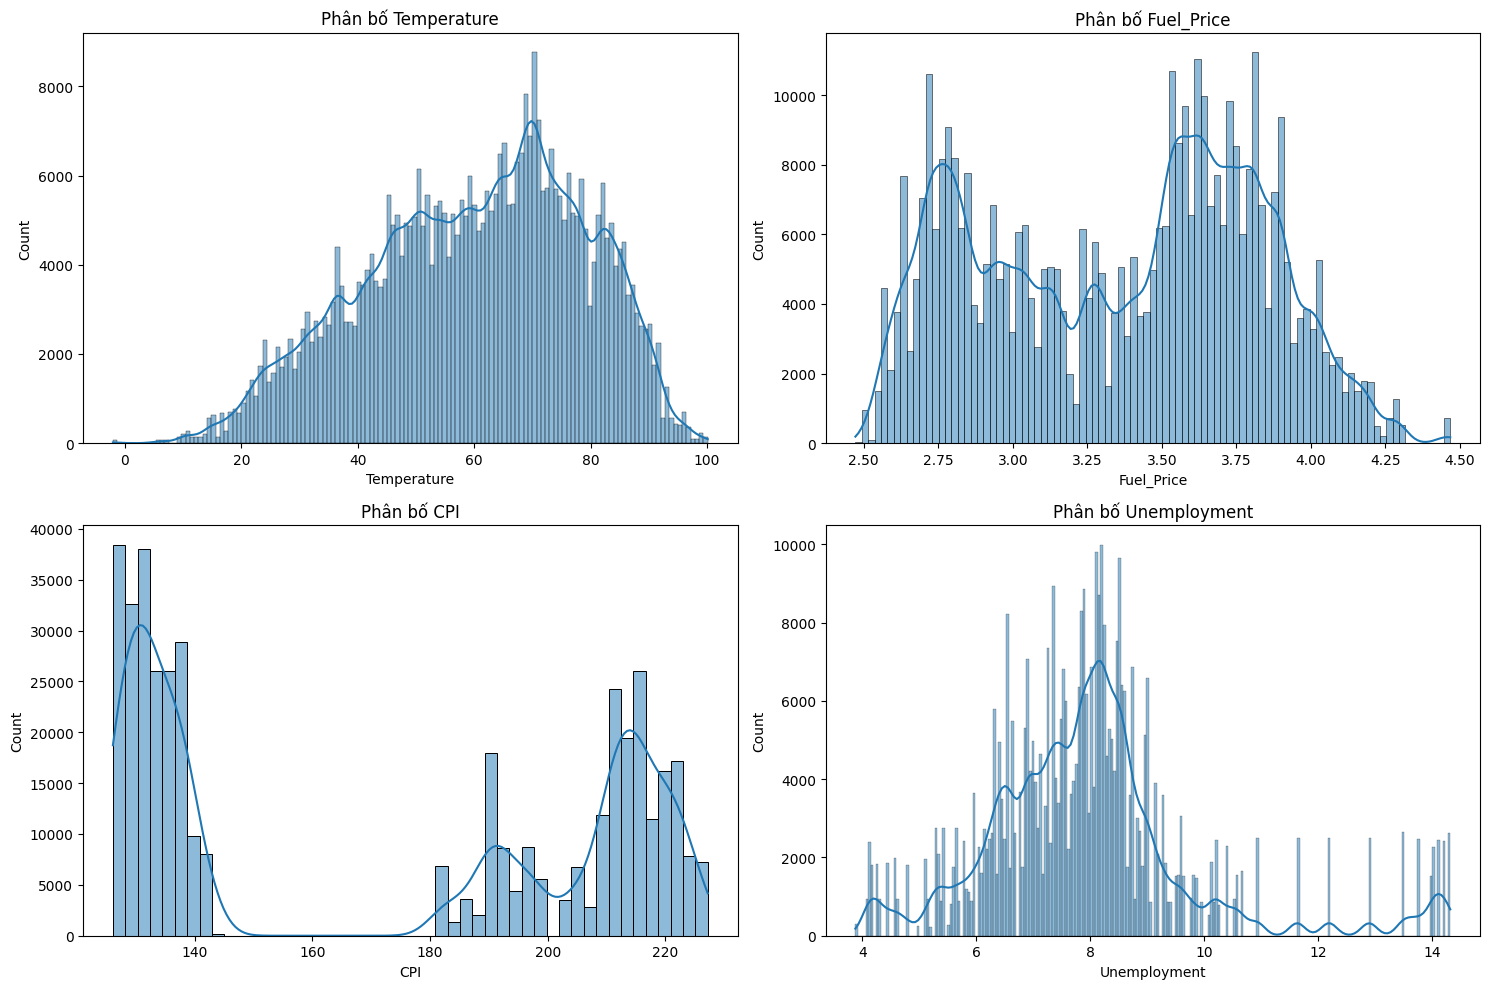

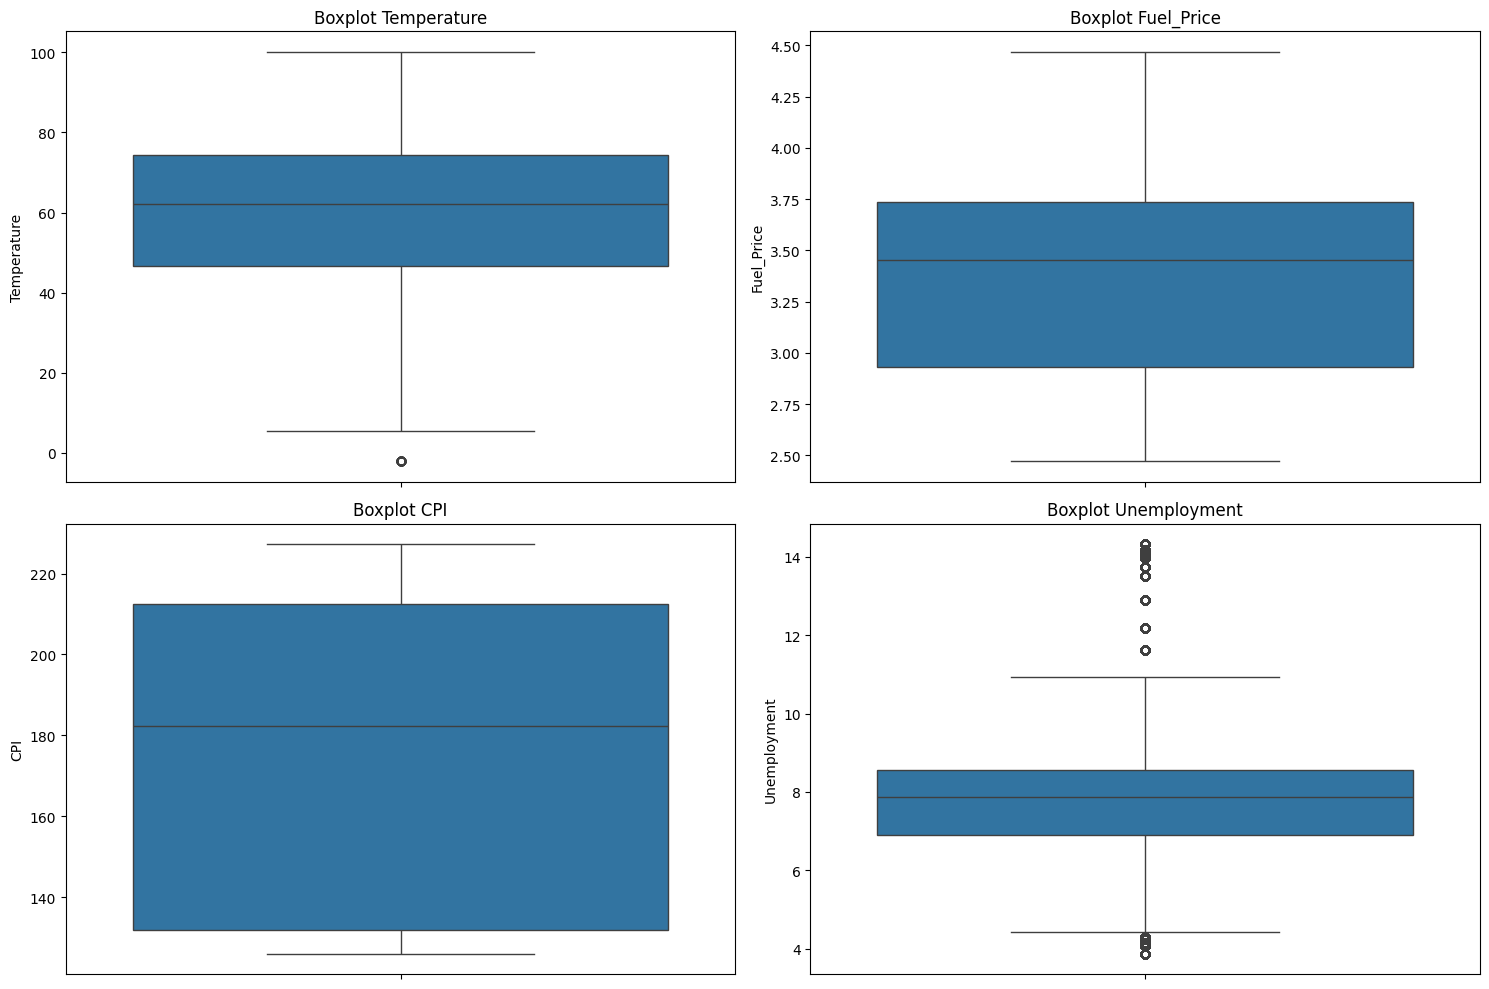

In [ ]:
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
print("\n Biểu đồ phân bố biến số trong features")
# Vẽ histogram cho các biến số trong features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân bố {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()
plt.close()

# Vẽ boxplot cho các biến số trong features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot {feature}')

plt.tight_layout()
plt.show()
plt.close()

2.1.2.2 Trực quan hóa phân bố dữ liệu trong tập store


 Biểu đồ phân bố Size trong tập stores:


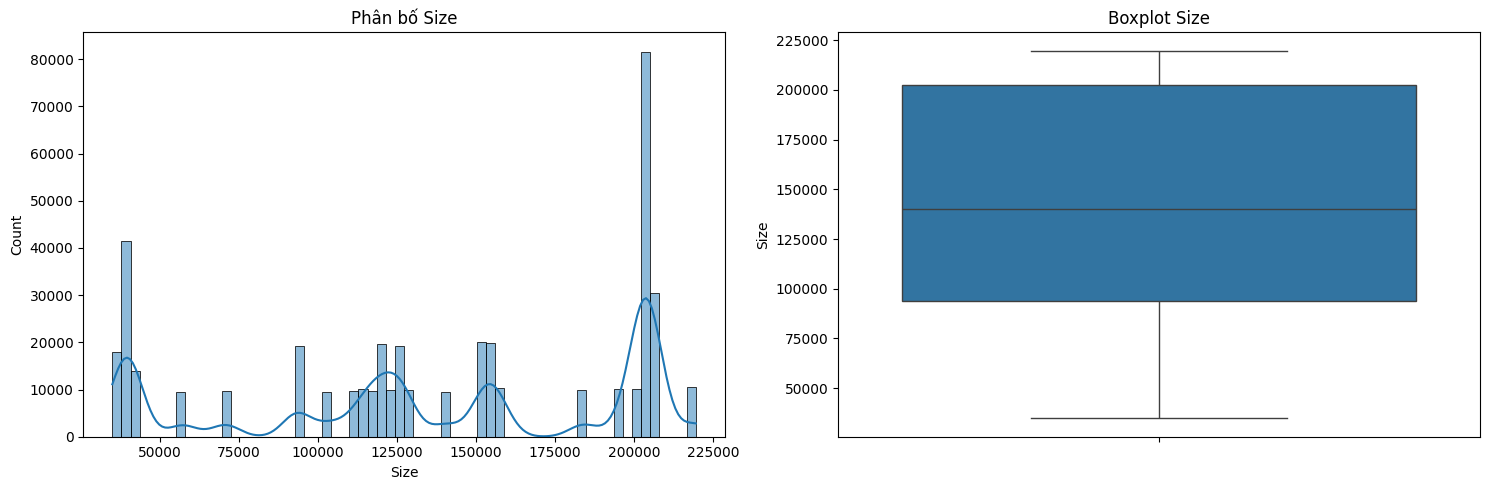

In [ ]:

print("\n Biểu đồ phân bố Size trong tập stores:")
plt.figure(figsize=(15, 5))
# Phân bố Size
plt.subplot(1, 2, 1)
sns.histplot(df['Size'], kde=True)
plt.title('Phân bố Size')
plt.xlabel('Size')

# Boxplot Size
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Size'])
plt.title('Boxplot Size')
plt.tight_layout()
plt.show()
plt.close()

2.1.2.3 Trực quan hóa dữ liệu trong tập train


 Biểu đồ phân bố dữ liệu doanh số hàng tuần (Weekly_Sales)


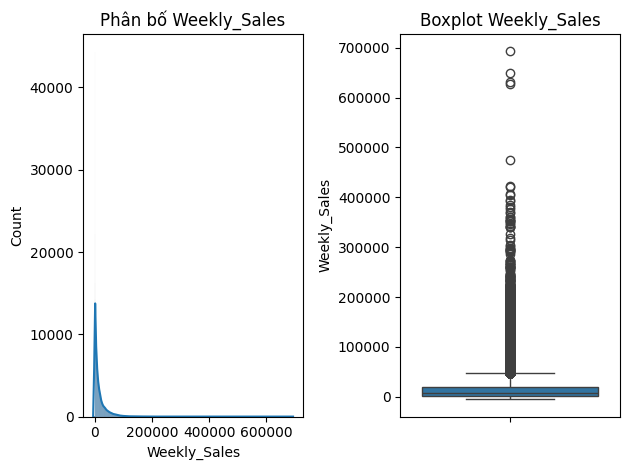

In [ ]:
print("\n Biểu đồ phân bố dữ liệu doanh số hàng tuần (Weekly_Sales)")
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Phân bố Weekly_Sales')
plt.xlabel('Weekly_Sales')

# Boxplot Weekly_Sales
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Weekly_Sales'])
plt.title('Boxplot Weekly_Sales')
plt.tight_layout()
plt.show()
plt.close()

* Nhận xét: \
Phần lớn giá trị Weekly_Sales tập trung gần 0 - 50,000, trong khi một số giá trị cao hơn có tần suất thấp. \
Có một số giá trị cực đại (outliers)  kéo dài đến hơn 600.000, cho thấy một số cửa hàng có doanh thu rất lớn\
Ở biểu đồ Boxplot, có thể thấy median nằm rất gần đáy hộp -> phần lớn doanh thu khá nhỏ\
Phần hộp (IQR - Interquartile Range) khá nhỏ, cho thấy phần lớn giá trị tập trung trong khoảng hẹp, nhưng vẫn có một số doanh số cực lớn.



---



**2.1.3. Biểu đồ tần suất của các biến phân loại**

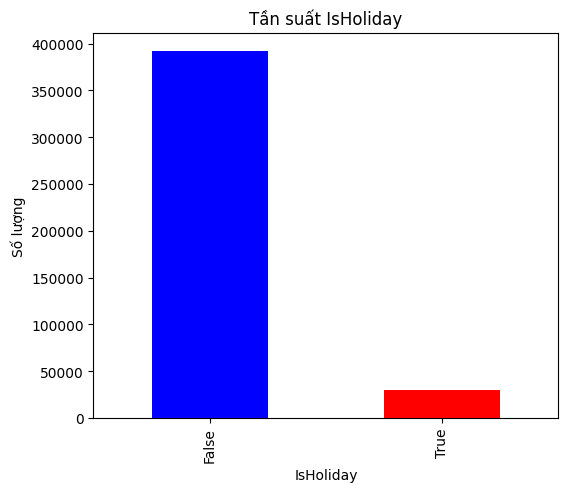

In [ ]:

plt.figure(figsize=(6, 5))  # Chỉnh kích thước phù hợp
df['IsHoliday'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Tần suất IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Số lượng')

plt.show()
plt.close()


2.2.2 Tỷ lệ tần suất của Type trong tập stores:


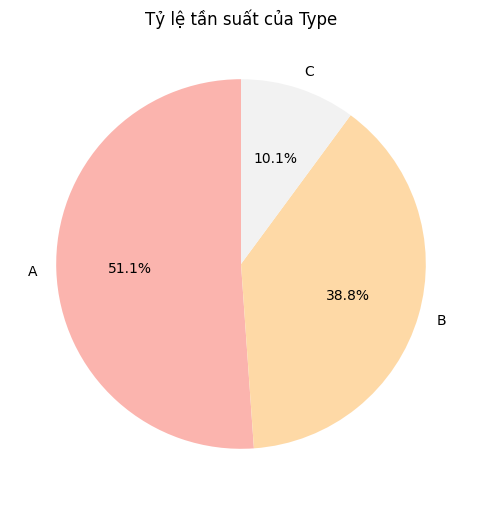

In [ ]:
print("\n2.2.2 Tỷ lệ tần suất của Type trong tập stores:")
plt.figure(figsize=(6, 6))  # Chỉnh kích thước biểu đồ
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')

plt.title('Tỷ lệ tần suất của Type')
plt.ylabel('')  # Ẩn nhãn trục y

plt.show()
plt.close()



---



**2.1.4. Xác định outliers**

2.1.4.1 Thống kê mô tả các biến số trong các tập dữ liệu để xác định outliers

In [ ]:

print("\n3. XÁC ĐỊNH OUTLIERS")
# Features dataset
print("\n4.1.1 Thống kê mô tả các biến số trong tập features để xác định outliers:")
for feature in num_features:
    print(f"\nThống kê mô tả cho {feature}:")
    print(df[feature].describe())

# Stores dataset
print("\n34.1.2 Thống kê mô tả Size trong tập stores để xác định outliers:")
print(df['Size'].describe())

# Train dataset
print("\n4.1.3 Thống kê mô tả tập train để xác định outliers:")
print(df['Weekly_Sales'].describe())




3. XÁC ĐỊNH OUTLIERS

4.1.1 Thống kê mô tả các biến số trong tập features để xác định outliers:

Thống kê mô tả cho Temperature:
count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

Thống kê mô tả cho Fuel_Price:
count    421570.000000
mean          3.361027
std           0.458515
min           2.472000
25%           2.933000
50%           3.452000
75%           3.738000
max           4.468000
Name: Fuel_Price, dtype: float64

Thống kê mô tả cho CPI:
count    421570.000000
mean        171.201947
std          39.159276
min         126.064000
25%         132.022667
50%         182.318780
75%         212.416993
max         227.232807
Name: CPI, dtype: float64

Thống kê mô tả cho Unemployment:
count    421570.000000
mean          7.960289
std           1.863296
min           3.879000
25%           6.891000
50%           7.866

2.1.4.2 Kết luận về outliers cho từng tập dữ liệu

 Kết luận outliers cho tập features

In [ ]:
# Features
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[feature] < (q1 - 1.5 * iqr)) |
                         (df[feature] > (q3 + 1.5 * iqr))]
    print(f"Số lượng outliers trong {feature}: {len(outliers)}")


Số lượng outliers trong Temperature: 69
Số lượng outliers trong Fuel_Price: 0
Số lượng outliers trong CPI: 0
Số lượng outliers trong Unemployment: 32114


Kết luận outliners cho tập store

In [ ]:
# Stores
q1_size = df['Size'].quantile(0.25)
q3_size = df['Size'].quantile(0.75)
iqr_size = q3_size - q1_size
outliers_size = df[(df['Size'] < (q1_size - 1.5 * iqr_size)) |
                        (df['Size'] > (q3_size + 1.5 * iqr_size))]
print(f"Số lượng outliers trong Size: {len(outliers_size)}")

Số lượng outliers trong Size: 0


Kết luận outliers cho tập train

In [ ]:
# Train
q1_sales = df['Weekly_Sales'].quantile(0.25)
q3_sales = df['Weekly_Sales'].quantile(0.75)
iqr_sales = q3_sales - q1_sales
outliers_sales = df[(df['Weekly_Sales'] < (q1_sales - 1.5 * iqr_sales)) |
                        (df['Weekly_Sales'] > (q3_sales + 1.5 * iqr_sales))]
print(f"\nSố lượng outliers trong Weekly_Sales: {len(outliers_sales)}")


Số lượng outliers trong Weekly_Sales: 35521


In [ ]:
pd.concat([df['Date'].head(5), df['Date'].tail(5)]) # hiển thị 5 dòng đầu và 5 dòng cuối.

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26




---



Dữ liệu được ghi lại từ ngày 05/02/2010 đến 26/10/2012

##2.2. PHÂN TÍCH HAI BIẾN CHO 3 TẬP DỮ LIỆU

####2.2.1.Phân tích Weeky_sales theo các biến số

2.2.1.1 Phân tích Weekly_sales theo Dept

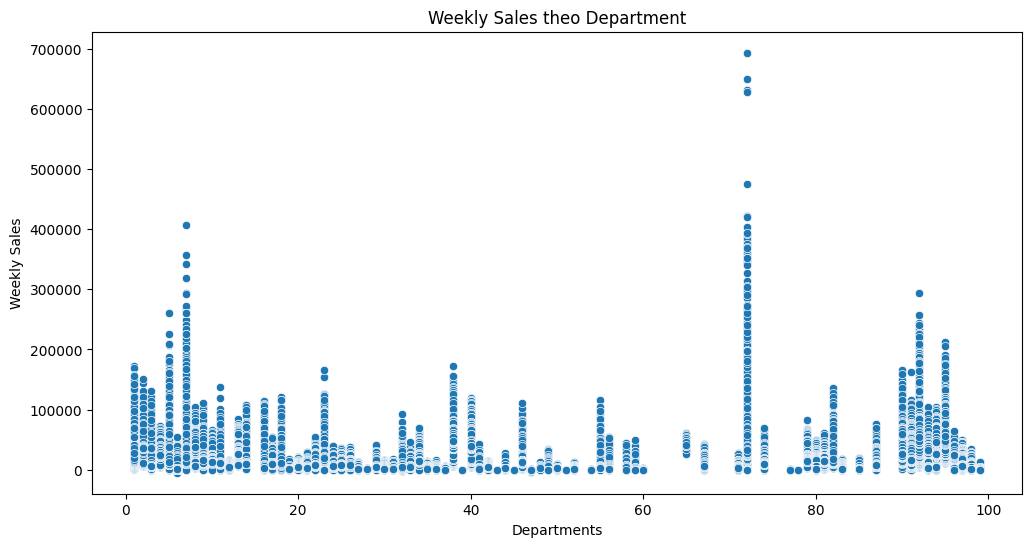

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly Sales theo Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.show()
plt.close()

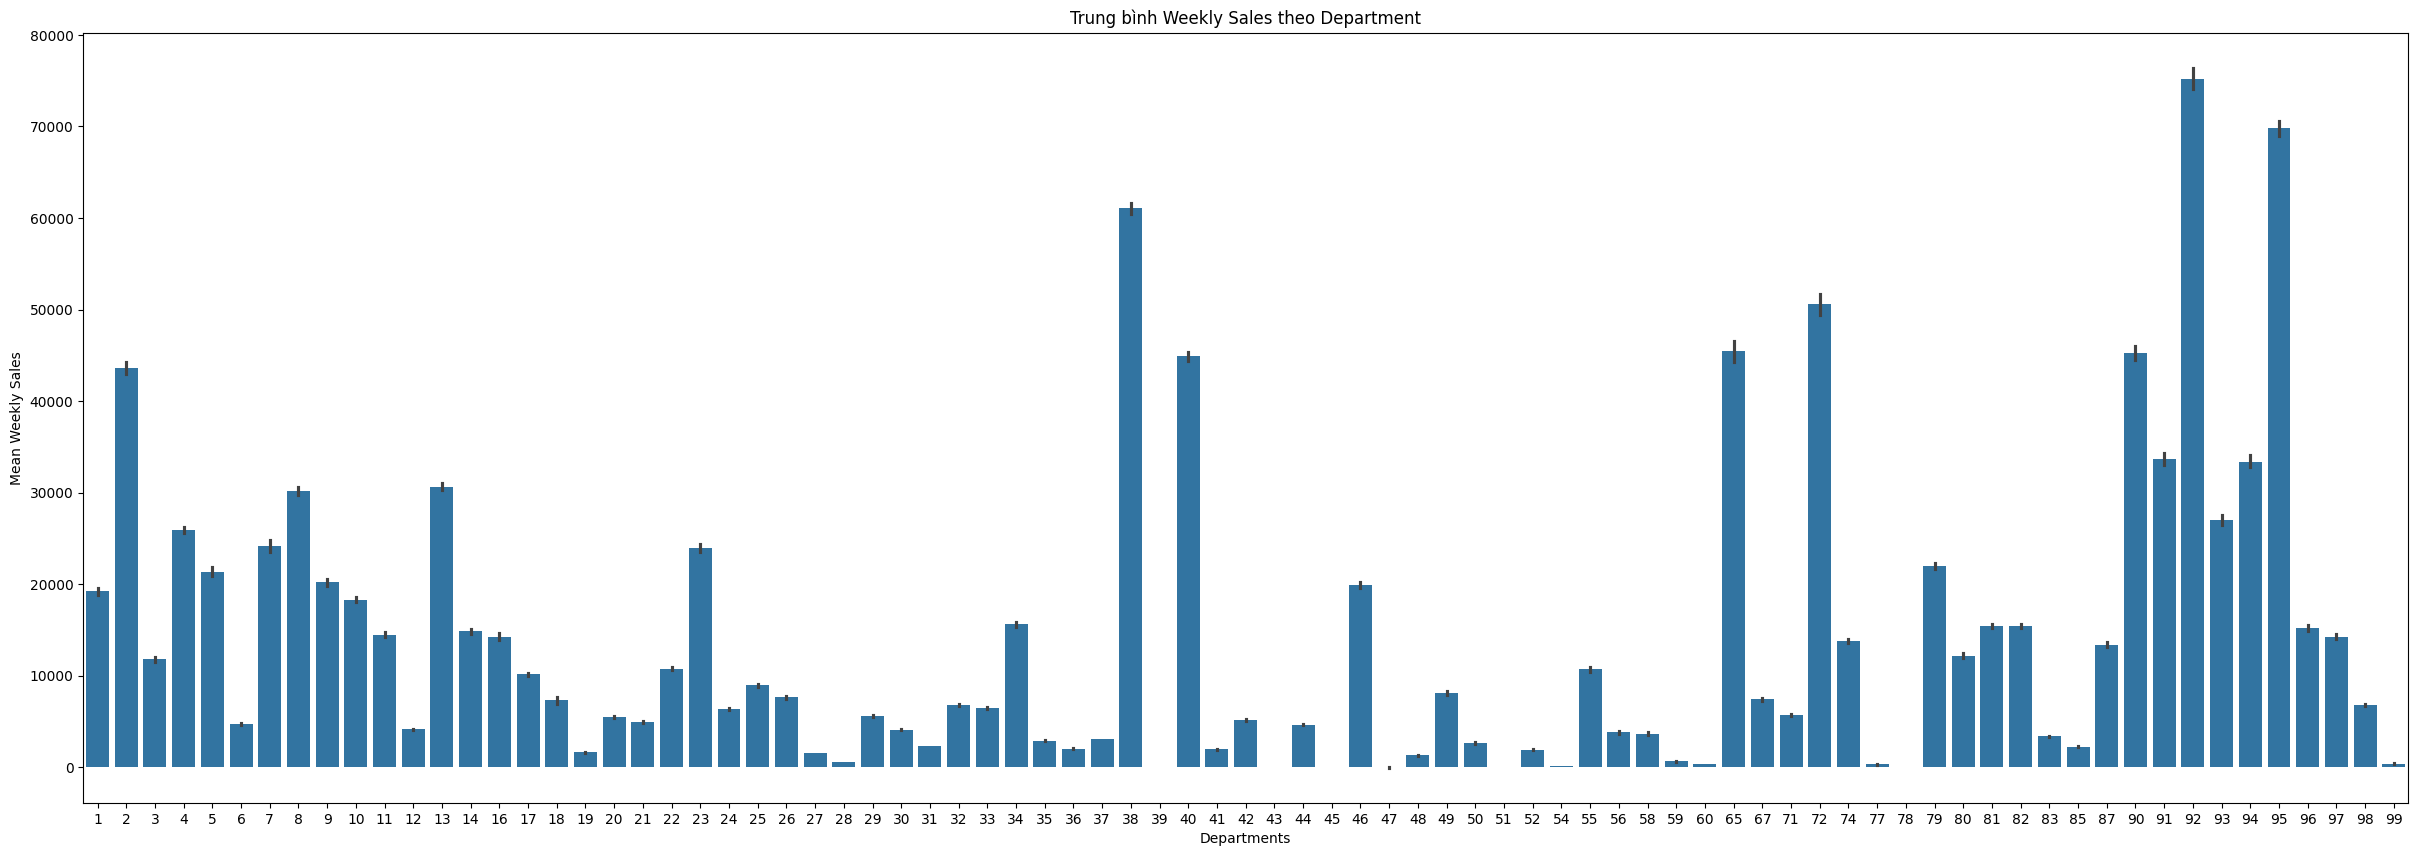

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Dept', y='Weekly_Sales', data=df, estimator='mean')
plt.title('Trung bình Weekly Sales theo Department')
plt.xlabel('Departments')
plt.ylabel('Mean Weekly Sales')
plt.show()
plt.close()

**Nhận xét:**
1. **Về phân bố dữ liệu**: có sự chênh lệch đáng kể về doanh số giữa các department, một số department có doanh số rất cao trong khi một số khác lại có doanh số thấp.

  * Department 2, 8, 13, 23, 38, 40, 72, 90, 91, 94-96 có doanh số vượt trội so với các department còn lại trên cả hai biểu đồ. Đặc biệt, department 92 có doanh số trên 700000, cao hơn các department còn lại. Điều này cho thấy các department này đóng vai trò quan trọng trong tổng doanh thu của chuỗi cửa hàng.
  * Một số department từ khoảng 50-60 và 65-70 có doanh số cực kỳ thấp hoặc gần như bằng 0. Điều này có thể do các department này ít quan trọng, ít giao dịch hoặc có sản phẩm kém hấp dẫn với khách hàng.


2. **Về tính tương quan giữa Weekly_Sales và Department:** biểu đồ  cho thấy các điểm dữ liệu phân bố không theo một xu hướng tuyến tính rõ ràng.

  * Một số department có doanh số rất cao trong khi các department khác có doanh số rất thấp, nhưng không có quy luật tuyến tính cho thấy doanh số tăng hoặc giảm theo thứ tự department.

-> Không có mối tương quan tuyến tính rõ ràng giữa Department và Weekly Salescho thấy Department không phải là yếu tố quyết định doanh số theo một quy luật đơn giản.



2.2.1.2 Weekly_sales theo Store

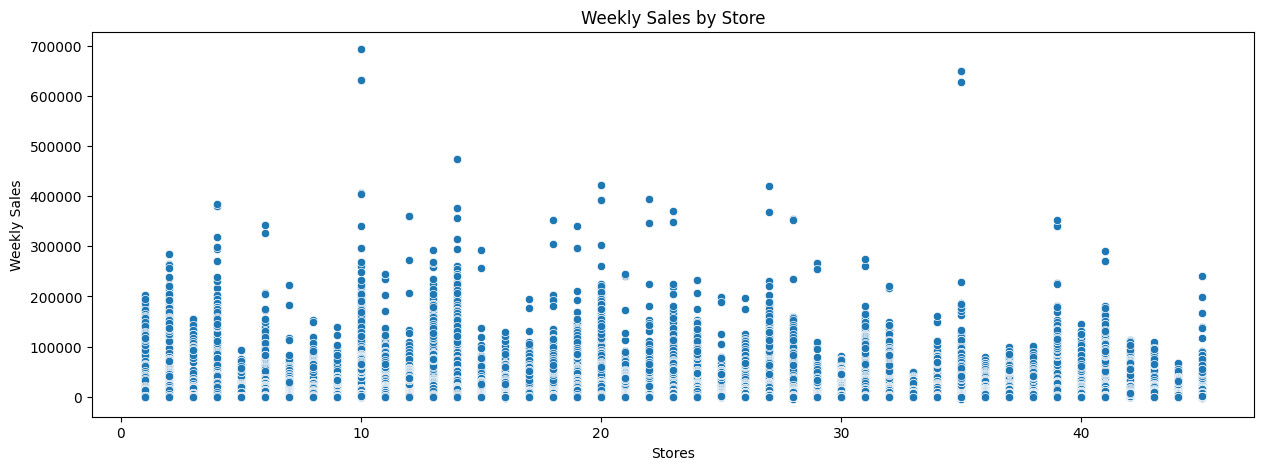

In [ ]:
x = df['Store']
y = df['Weekly_Sales']

plt.figure(figsize=(15, 5))
sns.scatterplot(x=x, y=y)
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.show()
plt.close()

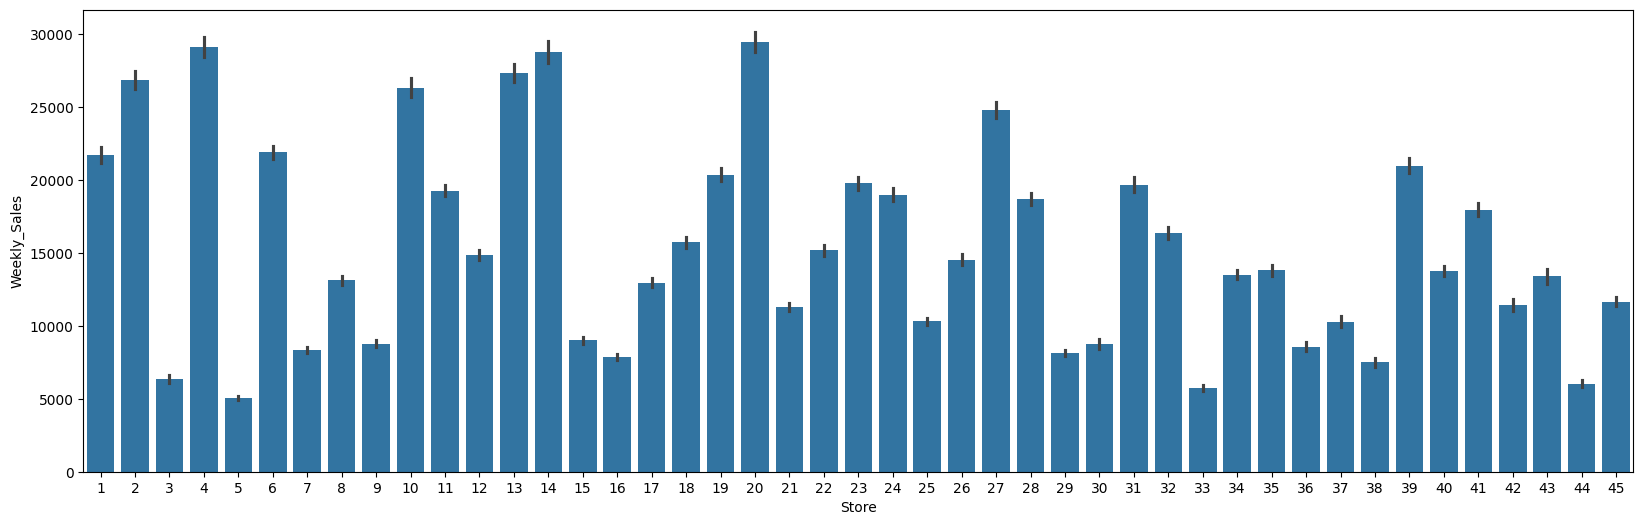

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

**Nhận xét:**

1. **Về phân bố dữ liệu:** điều tương tự xảy ra ở store khi có sự chênh lệch đáng kể về doanh số giữa các store, một số store có doanh số rất cao trong khi một số khác lại có doanh số thấp:

  * Các store có doanh số cao nhất thuộc về một số store cụ thể (ví dụ: Store 4, 14, 20).
2. **Về tính tương quan giữa Weekly_Sales và Store:**  biểu đồ cho thấy không có xu hướng tăng hoặc giảm rõ ràng giữa Store và Weekly_Sales.

  -> Biến số Store không có tương quan tuyến tính mạnh với Weekly_Sales.




2.2.1.3 Weekly_sales theo Date

In [ ]:
df_new = df.copy()

In [ ]:
df_new["Date"] = pd.to_datetime(df["Date"])
df_new['week'] = df_new['Date'].dt.isocalendar().week
df_new['month'] = df_new['Date'].dt.month
df_new['year'] = df_new['Date'].dt.year

In [ ]:
df_new.groupby('year')['Weekly_Sales'].mean()

,Weekly_Sales
year,
2010,16270.275737
2011,15954.070675
2012,15694.948597


Năm 2010 có Weekly_sales trung bình cao nhất

In [ ]:
df_new.groupby('month')['Weekly_Sales'].mean()

,Weekly_Sales
month,
1,14126.075111
2,16008.779217
3,15416.657597
4,15650.338357
5,15776.337202
6,16326.137002
7,15861.419650
8,16062.516933
9,15095.886154


Tháng 12 là tháng có trung bình Weekly_sales cao nhất

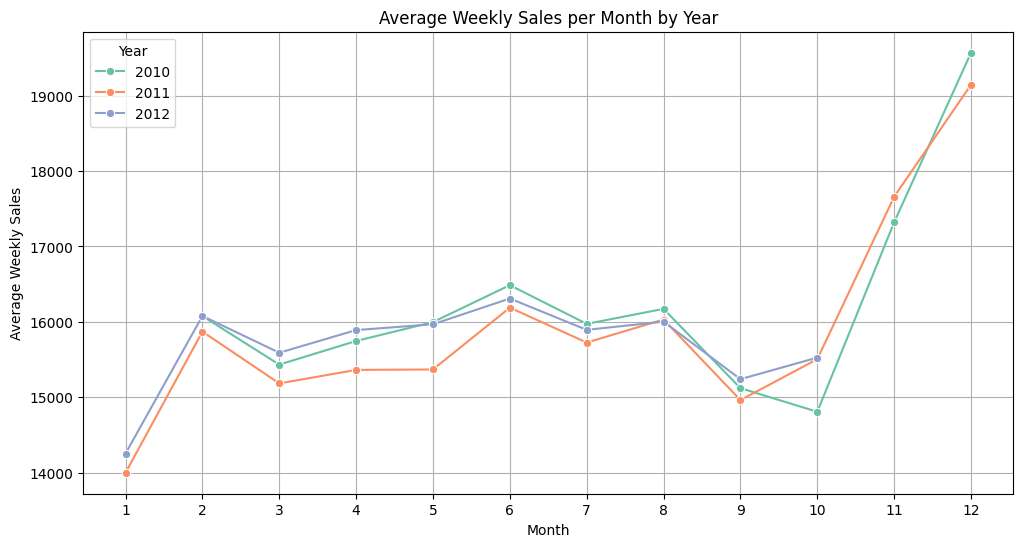

In [ ]:
# Pivot lại từ df_new
monthly_sales = pd.pivot_table(df_new, values="Weekly_Sales", columns="year", index="month").reset_index()

# Chuyển sang long format để dùng seaborn
monthly_sales_long = monthly_sales.melt(id_vars='month', var_name='year', value_name='Weekly_Sales')

# Vẽ lineplot với seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_long, x='month', y='Weekly_Sales', hue='year', marker="o", palette="Set2")

plt.title('Average Weekly Sales per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()
plt.close()

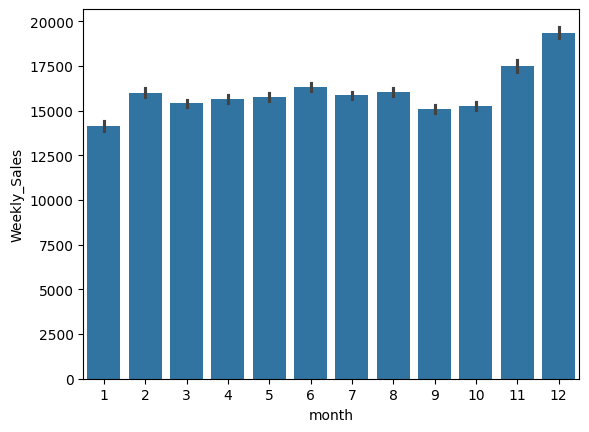

In [ ]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df_new)

**1. Về phân bố dữ liệu:**

  * Doanh số trung bình hàng tuần dao động trong khoảng 14.000 - 19.500.

  * Tháng 12 có mức doanh số cao nhất, cho thấy ảnh hưởng của các dịp mua sắm lớn như Giáng Sinh hoặc Black Friday.

  * Xu hướng doanh số theo từng tháng tương đối giống nhau giữa các năm, nhưng vẫn có sự khác biệt nhỏ ở một số thời điểm.

**2. Về tính tương quan giữa Weekly_Sales và Month:**

  * Không có mối quan hệ tuyến tính rõ ràng giữa thời gian và doanh số.

  * Xu hướng doanh số theo tháng khá tương đồng giữa các năm, nhưng vẫn có sự khác biệt nhỏ ở một số tháng nhất định.

  * Tăng mạnh vào tháng 2, giảm vào tháng 9 và tăng đột biến vào tháng 12, cho thấy yếu tố mùa vụ ảnh hưởng mạnh đến doanh số.
->  Biến Month có ảnh hưởng đến Weekly_Sales nhưng không theo dạng tuyến tính.

**3. So sánh giữa các năm:**
  * Năm 2011 có doanh số thấp hơn năm 2010 khi xem xét toàn bộ xu hướng.

  * Năm 2010 có mức doanh số trung bình cao nhất trong số các tháng đã có dữ liệu.

  * Năm 2012 có doanh số trung bình gần bằng năm 2010, mặc dù chưa có dữ liệu của tháng 11 và 12.


In [ ]:
df_new.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

,Weekly_Sales
week,
51,26396.399283
47,22220.944538
50,20413.010012
49,18668.667017
22,16779.736413


Tuần thứ 51 có giá trị Weekly_sales cao nhất

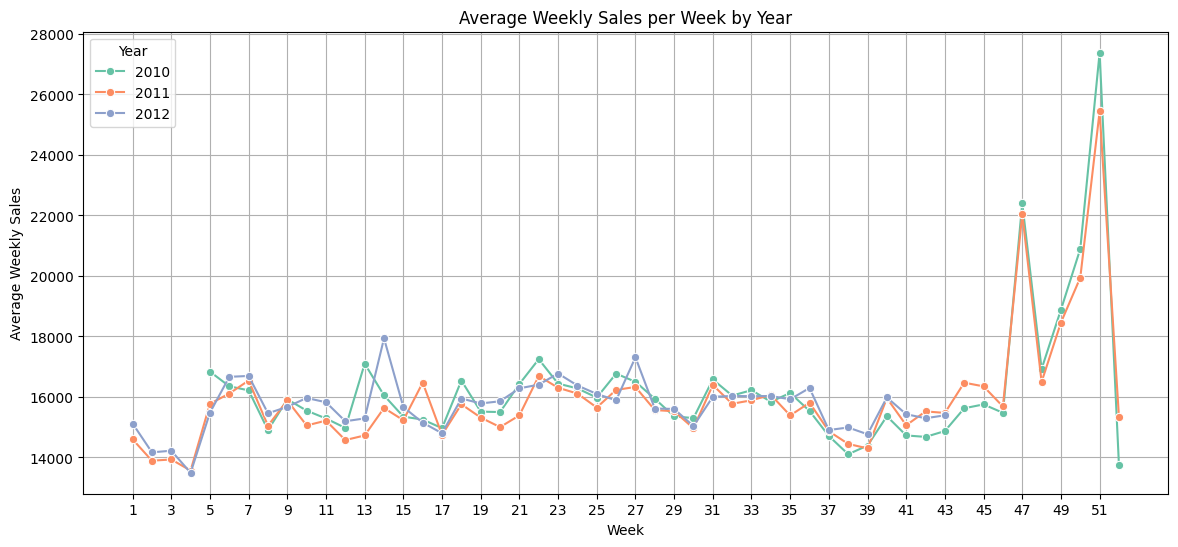

In [ ]:
# Tạo pivot table
weekly_sales = pd.pivot_table(df_new, values="Weekly_Sales", columns="year", index="week").reset_index()

# Chuyển sang long format
weekly_sales_long = weekly_sales.melt(id_vars='week', var_name='year', value_name='Weekly_Sales')

# Vẽ lineplot với seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales_long, x='week', y='Weekly_Sales', hue='year', marker="o", palette='Set2')

plt.title('Average Weekly Sales per Week by Year')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 53, 2))
plt.legend(title='Year')
plt.grid(True)
plt.show()
plt.close()

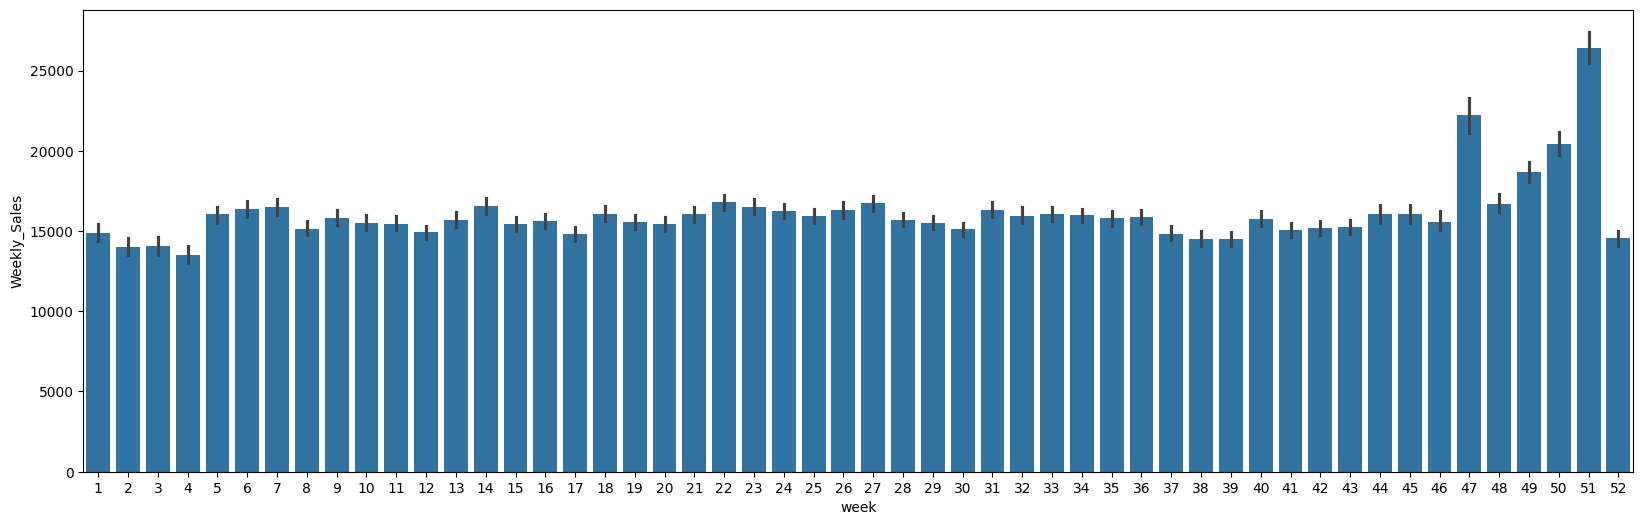

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df_new)

2.2.1.4 Weekly Sales - 4 Features (Temperature, Fuel Price, CPI, Unemployment)

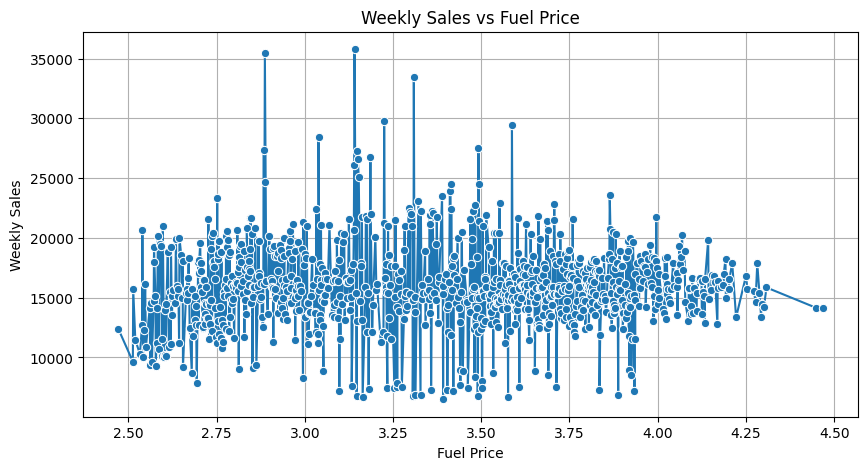

In [ ]:
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price").reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=fuel_price, x="Fuel_Price", y="Weekly_Sales", marker='o')
plt.title("Weekly Sales vs Fuel Price")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()
plt.close()

**Nhận xét:**

**1. Phân bố dữ liệu**
  * Biểu đồ thể hiện sự phân bố của doanh số bán hàng hàng tuần theo mức giá nhiên liệu.

  * Dữ liệu có sự phân tán rộng, phản ánh mức độ biến động lớn trong doanh số.

  * Phần lớn doanh số nằm trong khoảng từ 10.000 đến 20.000, nhưng có một số điểm ngoại lệ vượt 30.000.

**2. Mối quan hệ giữa giá nhiên liệu và doanh số**
  * Không có mối tương quan tuyến tính rõ ràng giữa giá nhiên liệu và doanh số bán hàng.

  * Dữ liệu phân tán rộng, doanh số dao động mạnh ở nhiều mức giá nhiên liệu khác nhau.

  * Khi giá nhiên liệu thấp (2.5 - 3.5), doanh số có sự biến động lớn (10.000 - 35.000).

  * Khi giá nhiên liệu cao (>4.0), doanh số có xu hướng tập trung ở mức thấp hơn (10.000 - 15.000), nhưng không có quy luật rõ ràng.

 -> Giá nhiên liệu không ảnh hưởng đáng kể đến doanh số

**3. Xu hướng tổng thể**

  * Khi giá nhiên liệu nằm trong khoảng 2.5 đến 4.0, doanh số dao động mạnh mà không theo một hướng cụ thể.

  * Khi giá nhiên liệu vượt 4.0, có dấu hiệu doanh số giảm nhẹ, nhưng mức độ ảnh hưởng không đáng kể.

  * Điều này gợi ý rằng tác động của giá nhiên liệu lên doanh số không thực sự mạnh.

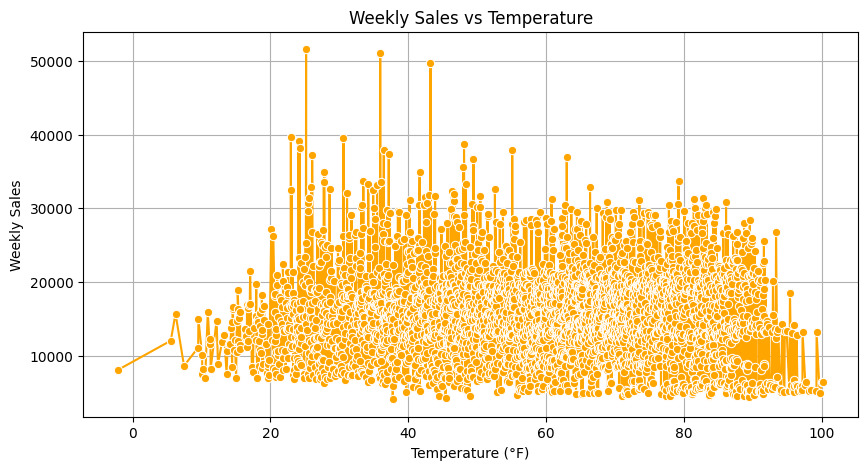

In [ ]:
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature").reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=temp, x="Temperature", y="Weekly_Sales", marker='o', color='orange')
plt.title("Weekly Sales vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()
plt.close()

**Nhận xét:**

**1. Phân bố dữ liệu**
  * Doanh số có sự phân tán rộng trên toàn bộ dải nhiệt độ, từ 0°F đến 100°F.

  * Phần lớn điểm dữ liệu tập trung trong khoảng 20°F - 80°F, cho thấy đây là khoảng nhiệt độ phổ biến nhất.

  * Có một số điểm ngoại lệ với doanh số rất cao (>50.000) nhưng không xuất hiện thường xuyên.

**2. Mối quan hệ tương quan giữa nhiệt độ và doanh số**
  * Không có mối tương quan tuyến tính rõ ràng giữa nhiệt độ và doanh số.

  * Ở mức nhiệt độ dưới 20°F, doanh số có xu hướng thấp hơn, nhưng vẫn có một số điểm ngoại lệ với doanh số cao.

  * Khi nhiệt độ tăng lên từ 20°F - 80°F, doanh số dao động mạnh và không theo một xu hướng cố định.

  * Khi nhiệt độ vượt 80°F, doanh số có xu hướng giảm nhẹ, nhưng vẫn có nhiều điểm dữ liệu với doanh số cao.

**3. Xu hướng tổng thể**
  * Doanh số không bị ảnh hưởng mạnh bởi nhiệt độ, nhưng có thể có một số tác động gián tiếp (ví dụ: mùa đông có thể ảnh hưởng đến hành vi mua sắm).

  * Doanh số đạt mức cao nhất trong khoảng 30°F - 70°F, có thể phản ánh mức nhiệt độ phù hợp cho hoạt động mua sắm.

  * Khi nhiệt độ cực đoan (quá lạnh hoặc quá nóng), doanh số có xu hướng giảm, nhưng vẫn có nhiều biến động.

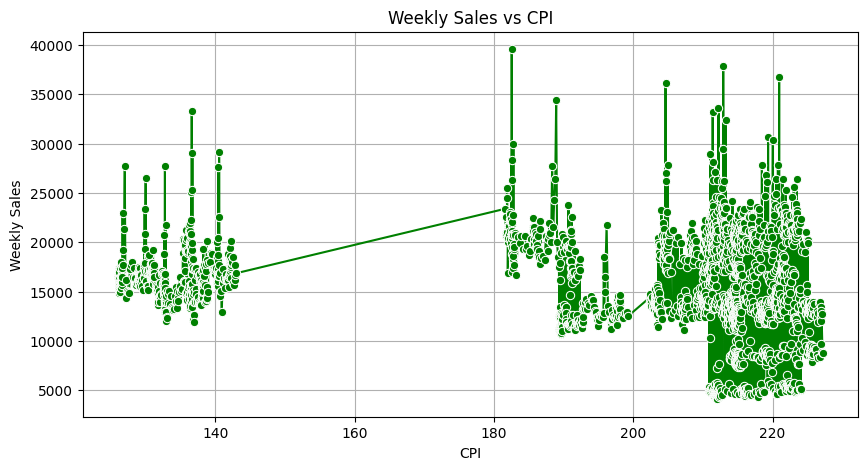

In [ ]:
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI").reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=CPI, x="CPI", y="Weekly_Sales", marker='o', color='green')
plt.title("Weekly Sales vs CPI")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()
plt.close()

**Nhận xét:**

**1. Phân bố dữ liệu**
  * Dữ liệu được chia thành hai nhóm chính:

    * Nhóm thứ nhất tập trung quanh CPI ≈ 130 - 140 với doanh số dao động chủ yếu từ 10.000 - 30.000.

    * Nhóm thứ hai nằm trong khoảng CPI ≈ 180 - 220, với mức doanh số có sự phân tán rộng hơn.

  * Ở cả hai nhóm, có nhiều điểm ngoại lệ với doanh số vượt 35.000, nhưng không xuất hiện thường xuyên.

**2. Mối quan hệ tương quan giữa CPI và doanh số**
  * Nhóm CPI 130 - 140 có doanh số khá ổn định và không có xu hướng rõ ràng.

  * Nhóm CPI 180 - 220 có sự phân tán mạnh hơn, với doanh số dao động lớn.

  * Nhìn tổng thể, đường xu hướng có độ dốc nhẹ, cho thấy CPI có thể có mối tương quan dương yếu với doanh số, nhưng không rõ ràng.

**3. Xu hướng tổng thể**
  * Khi CPI tăng từ 130 lên 140, doanh số không có sự thay đổi đáng kể.

  * Khi CPI vượt 180, doanh số trở nên biến động hơn, có cả mức thấp lẫn cao hơn so với nhóm trước.

  * Nhìn chung, CPI không ảnh hưởng rõ ràng đến doanh số, nhưng sự thay đổi của CPI có thể liên quan đến các yếu tố khác như lạm phát, giá cả hàng hóa, ảnh hưởng đến hành vi mua sắm của khách hàng.

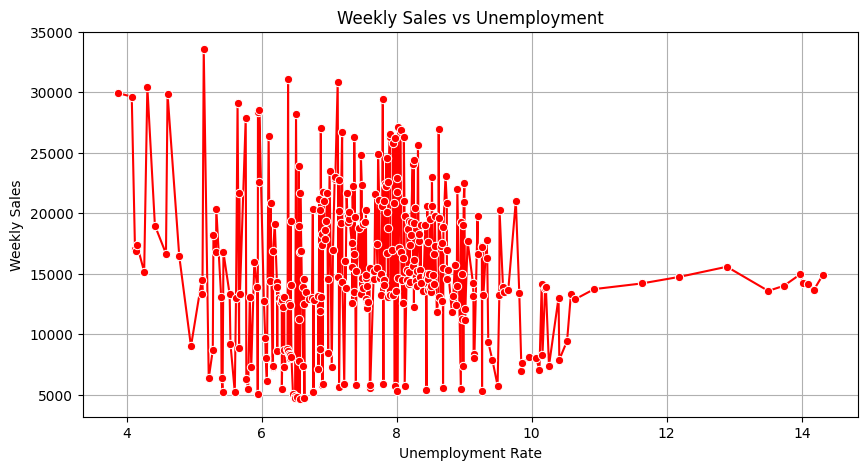

In [ ]:
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment").reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=unemployment, x="Unemployment", y="Weekly_Sales", marker='o', color='red')
plt.title("Weekly Sales vs Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()
plt.close()

**Nhận xét:**

**1. Phân bố dữ liệu**

* Dữ liệu được chia thành hai nhóm chính:

  * Nhóm thứ nhất tập trung quanh Unemployment ≈ 4% - 6% với doanh số dao động chủ yếu từ 15.000 - 30.000.
  * Nhóm thứ hai nằm trong khoảng Unemployment ≈ 6% - 10%, với mức doanh số có sự phân tán rộng hơn.


* Một số điểm ngoại lệ với doanh số vượt 30.000, nhưng không xuất hiện thường xuyên.

**2. Mối quan hệ tương quan giữa Unemployment và doanh số**

* Nhóm Unemployment 4% - 6% có doanh số khá cao và ổn định ở ngưỡng trên.
* Nhóm Unemployment 6% - 10% có sự phân tán mạnh hơn, với doanh số dao động lớn.

-> Nhìn tổng thể, đường xu hướng có độ dốc giảm, cho thấy Unemployment có thể có mối tương quan nghịch với doanh số, nhưng không rõ ràng.

**3. Xu hướng tổng thể**

* Khi Unemployment tăng từ 4% lên 6%, doanh số có xu hướng giảm đáng kể.
* Khi Unemployment vượt 6%, doanh số trở nên biến động hơn, có cả mức thấp lẫn cao hơn so với nhóm trước.

-> Nhìn chung, Unemployment có ảnh hưởng tiêu cực đến doanh số, thể hiện qua xu hướng giảm của doanh số khi tỷ lệ thất nghiệp tăng, đặc biệt rõ trong khoảng 4-10%. Tuy nhiên, khi Unemployment > 10%, doanh số có xu hướng ổn định hơn ở mức thấp.

###2.2.2. Ảnh hưởng của biến phân loại lên biến số

**2.2.2.1 Ảnh hưởng của IsHoliday đến Weekly Sales**

Phân tích cột IsHoliday

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

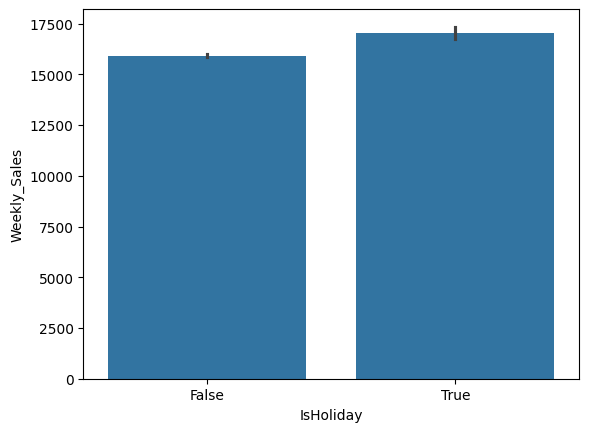

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].nunique()

10

In [ ]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [ ]:
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

**Nhận xét:**

Qua quan sát, ta có thể thấy dữ liệu có 4 ngày lễ chính \
1. Trong tháng 2 (12/02/2010, 11/02/2011, 10/02/2010 ) : Ngày tổ chức trận chung kết giải bóng bầu dục NFL (Super Bowl )
2. Trong tháng 9 (10/09/2010, 09/09/2011, 07/09/2012) : dịp lễ Ngày Lao động ( Labor Day )
3. Trong tháng 11 (26/11/2010 và 25/11/2011 ):
Lễ Tạ ơn ( Thanksgiving )
4. Trong tháng 12 (31/12/2010 và 30/12/2011) : Dip lễ Giáng sinh ( Christmas )

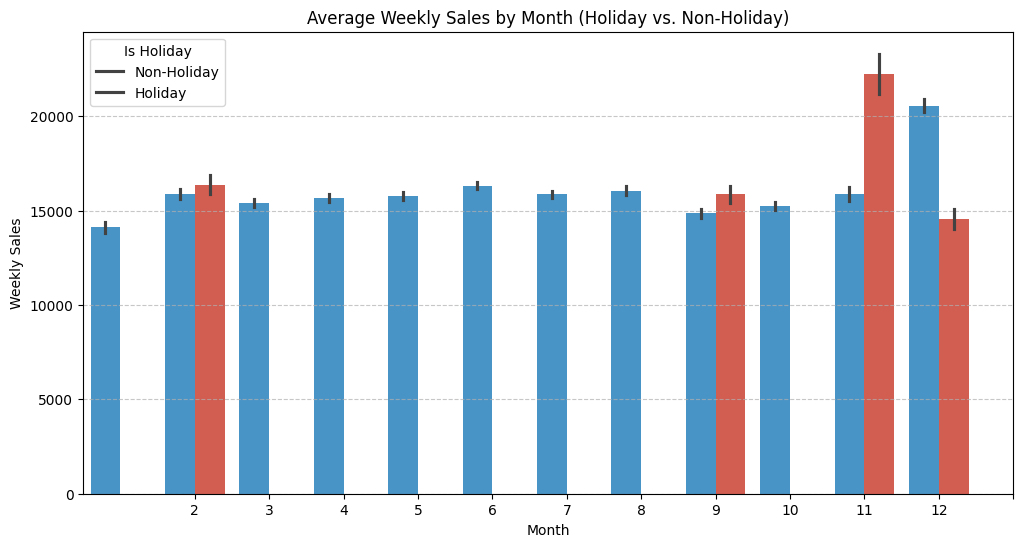

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=df_new, x="month", y="Weekly_Sales", hue="IsHoliday", palette=["#3498db", "#e74c3c"])

plt.title("Average Weekly Sales by Month (Holiday vs. Non-Holiday)")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.xticks(range(1, 13))  # Hiển thị tháng từ 1 đến 12
plt.legend(title="Is Holiday", labels=["Non-Holiday", "Holiday"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
plt.close()

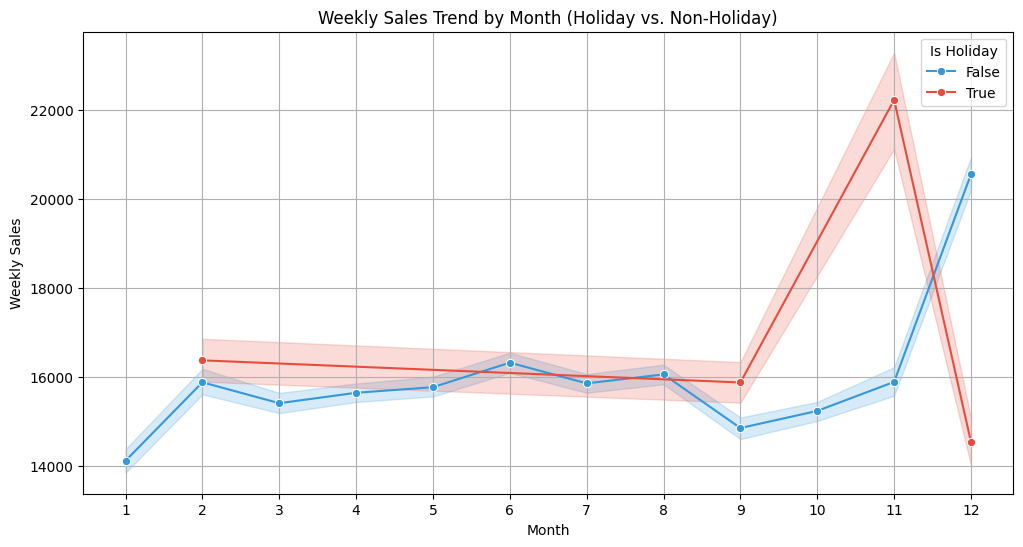

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_new,
    x="month",
    y="Weekly_Sales",
    hue="IsHoliday",
    marker="o",
    palette=["#3498db", "#e74c3c"]
)

plt.title("Weekly Sales Trend by Month (Holiday vs. Non-Holiday)")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.xticks(range(1, 13))
plt.legend(title="Is Holiday")
plt.grid(True)
plt.show()
plt.close()


**Nhận xét:**

**1. Phân bố dữ liệu**
* Dữ liệu Weekly Sales được chia thành hai nhóm chính:

  * Nhóm Non-Holiday (không phải ngày lễ): Có xu hướng ổn định trong phần lớn các tháng, dao động trong khoảng 14.000 - 16.000, với đỉnh đặc biệt vào tháng 12 (khoảng 20.000).
  * Nhóm Holiday (ngày lễ): Xuất hiện chủ yếu ở các tháng 2, 9, 11 và 12, với mức biến động lớn hơn, đặc biệt là đỉnh cao nhất vào tháng 11 (trên 22.000).

**2. Mối quan hệ giữa biến phân loại Holiday/Non-holiday và Weekly Sales**

* Nhóm Holiday có mức doanh số trung bình cao hơn so với nhóm Non-Holiday ở hầu hết các thời điểm xuất hiện (tháng 2, 9, 11), ngoại trừ tháng 12.
* Sự chênh lệch rõ rệt nhất giữa hai nhóm xuất hiện ở tháng 11, khi doanh số ngày lễ vượt trội hơn hẳn (khoảng 22.000 so với 16.000).

-> Nhìn tổng thể, Holiday có tương quan thuận với doanh số Weekly Sales, nhưng mức độ ảnh hưởng thay đổi theo tháng, thể hiện rõ sự tương tác giữa hai biến phân loại: Holiday và tháng trong năm.

**3. Ảnh hưởng của biến phân loại đến biến số Weekly Sales**

Tác động của Holiday đến Weekly Sales thay đổi theo mùa vụ rõ rệt và ảnh hưởng rõ nhất trong 4 tháng có các ngày lễ lớn :
* Tháng 2, 9: Holiday cao hơn 5-7%
* Tháng 11: Holiday cao hơn 40% (ảnh hưởng mạnh nhất)
* Tháng 12: Holiday thấp hơn Non-Holiday

-> Biểu đồ cho thấy rõ độ biến động của doanh số Holiday lớn hơn Non-Holiday, đặc biệt vào các tháng 11 và 12, cho thấy tính không ổn định của doanh số trong thời gian.

Tiếp theo, chúng ta sẽ phân tích liệu trong 4 lễ hội này thì lễ hội nào sẽ có ảnh hưởng lớn nhất đến weekly_sales\
Ta sẽ đặt tên cho từng lễ hội và tạo một bản sao dataframe có thêm 4 cột loại lễ hội

In [ ]:
df_new.loc[df_new['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'Lễ hội tháng 2'] = True
df_new.loc[~df_new['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'Lễ hội tháng 2'] = False

df_new.loc[df_new['Date'].isin(['2010-09-10', '2011-09-09', '2012-09-07']), 'Lễ hội tháng 9'] = True
df_new.loc[~df_new['Date'].isin(['2010-09-10', '2011-09-09', '2012-09-07']), 'Lễ hội tháng 9'] = False

df_new.loc[df_new['Date'].isin(['2010-11-26', '2011-11-25']), 'Lễ hội tháng 11'] = True
df_new.loc[~df_new['Date'].isin(['2010-11-26', '2011-11-25']), 'Lễ hội tháng 11'] = False

df_new.loc[df_new['Date'].isin(['2010-12-31', '2011-12-30']), 'Lễ hội tháng 12'] = True
df_new.loc[~df_new['Date'].isin(['2010-12-31', '2011-12-30']), 'Lễ hội tháng 12'] = False

/tmp/ipython-input-56-4129762229.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.loc[df_new['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'Lễ hội tháng 2'] = True
/tmp/ipython-input-56-4129762229.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.loc[~df_new['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'Lễ hội tháng 2'] = False
/tmp/ipython-input-56-4129762229.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matchin

<Axes: xlabel='Lễ hội tháng 2', ylabel='Weekly_Sales'>

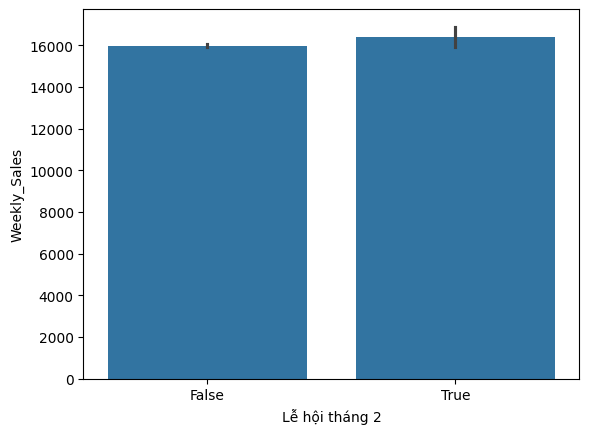

In [ ]:
sns.barplot(x='Lễ hội tháng 2', y='Weekly_Sales', data=df_new) # so sánh weekly_sales trong lễ hội trong tháng 2 với nằm ngoài thời gian lễ hội tháng 2

<Axes: xlabel='Lễ hội tháng 9', ylabel='Weekly_Sales'>

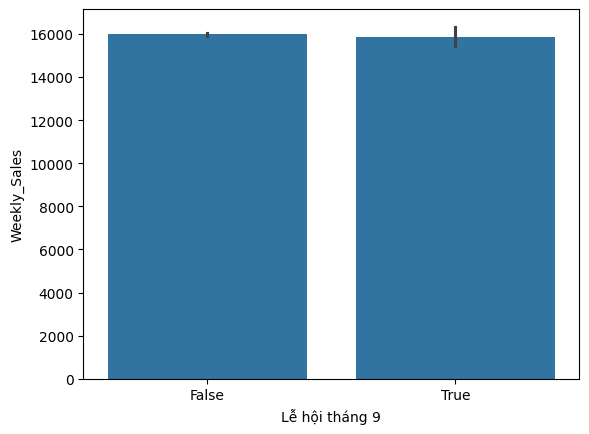

In [ ]:
sns.barplot(x='Lễ hội tháng 9', y='Weekly_Sales', data=df_new) # so sánh weekly_sales trong lễ hội trong tháng 9 với nằm ngoài thời gian lễ hội tháng 9

<Axes: xlabel='Lễ hội tháng 11', ylabel='Weekly_Sales'>

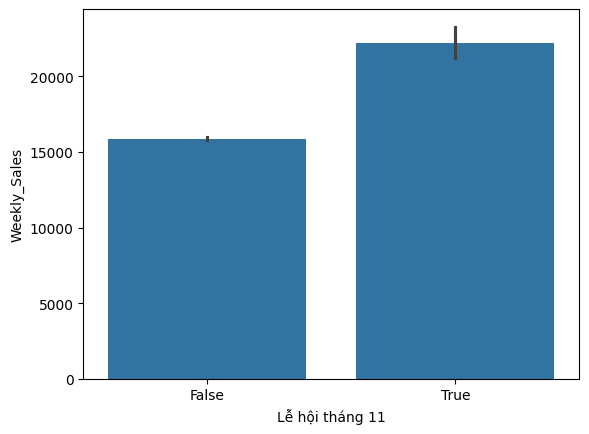

In [ ]:
sns.barplot(x='Lễ hội tháng 11', y='Weekly_Sales', data=df_new) # so sánh weekly_sales trong lễ hội trong tháng 11 với nằm ngoài thời gian lễ hội tháng 11

<Axes: xlabel='Lễ hội tháng 12', ylabel='Weekly_Sales'>

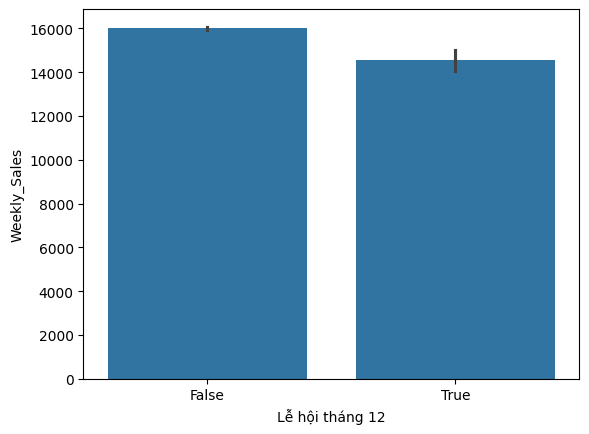

In [ ]:
sns.barplot(x='Lễ hội tháng 12', y='Weekly_Sales', data=df_new) # so sánh weekly_sales trong lễ hội trong tháng 12 với nằm ngoài thời gian lễ hội tháng 12

**Nhận xét:**
* Biểu đồ cho thấy lễ hội trong tháng 9 và 12 không làm tăng doanh số trung bình hàng tuần.\
* Có một chút tác động tích cực đến doanh số trong ở lễ hội diễn ra trong tháng 2, nhưng tăng trưởng sales rõ rệt nhất là trong lễ diễn ra ở tháng 11

**2.2.2.2 Ảnh hưởng của Type lên IsHoliday**

In [ ]:
# Lọc dữ liệu ngày lễ
holiday_data = df_new[df_new['IsHoliday'] == True]['Type'].value_counts(normalize=True) * 100

# Lọc dữ liệu ngày không phải lễ
non_holiday_data = df_new[df_new['IsHoliday'] == False]['Type'].value_counts(normalize=True) * 100

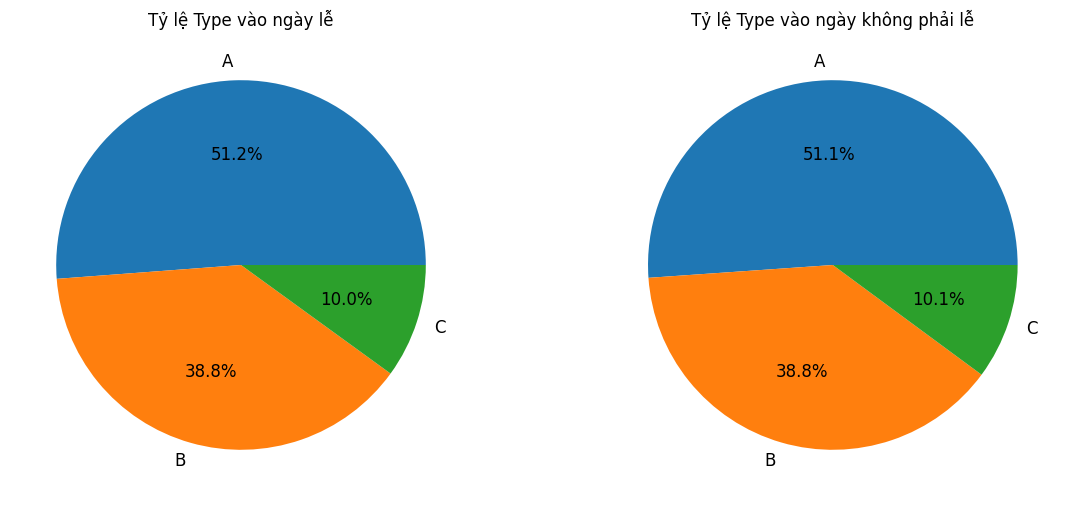

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Tạo 2 biểu đồ cạnh nhau

# Biểu đồ ngày lễ
axes[0].pie(holiday_data.values, labels=holiday_data.index, autopct='%1.1f%%', textprops={'fontsize': 12})
axes[0].set_title("Tỷ lệ Type vào ngày lễ")

# Biểu đồ ngày không phải lễ
axes[1].pie(non_holiday_data.values, labels=non_holiday_data.index, autopct='%1.1f%%', textprops={'fontsize': 12})
axes[1].set_title("Tỷ lệ Type vào ngày không phải lễ")

plt.show()
plt.close()

**Nhận xét:**
* 2 biểu đồ cho chúng ta thấy được là dù vào ngày lễ hay không thì cửa hàng loại A vẫn chiếm tỉ lệ lớn nhất

In [ ]:
holidays = ['Lễ hội tháng 11', 'Lễ hội tháng 2', 'Lễ hội tháng 9', 'Lễ hội tháng 12']

# Khởi tạo danh sách để lưu trung bình doanh số
A_means = []
B_means = []
C_means = []

# Lặp qua từng lễ hội để tính trung bình
for holiday in holidays:
    A_means.append(df_new.loc[df_new[holiday] == True].loc[df_new['Type'] == 'A', 'Weekly_Sales'].mean())
    B_means.append(df_new.loc[df_new[holiday] == True].loc[df_new['Type'] == 'B', 'Weekly_Sales'].mean())
    C_means.append(df_new.loc[df_new[holiday] == True].loc[df_new['Type'] == 'C', 'Weekly_Sales'].mean())

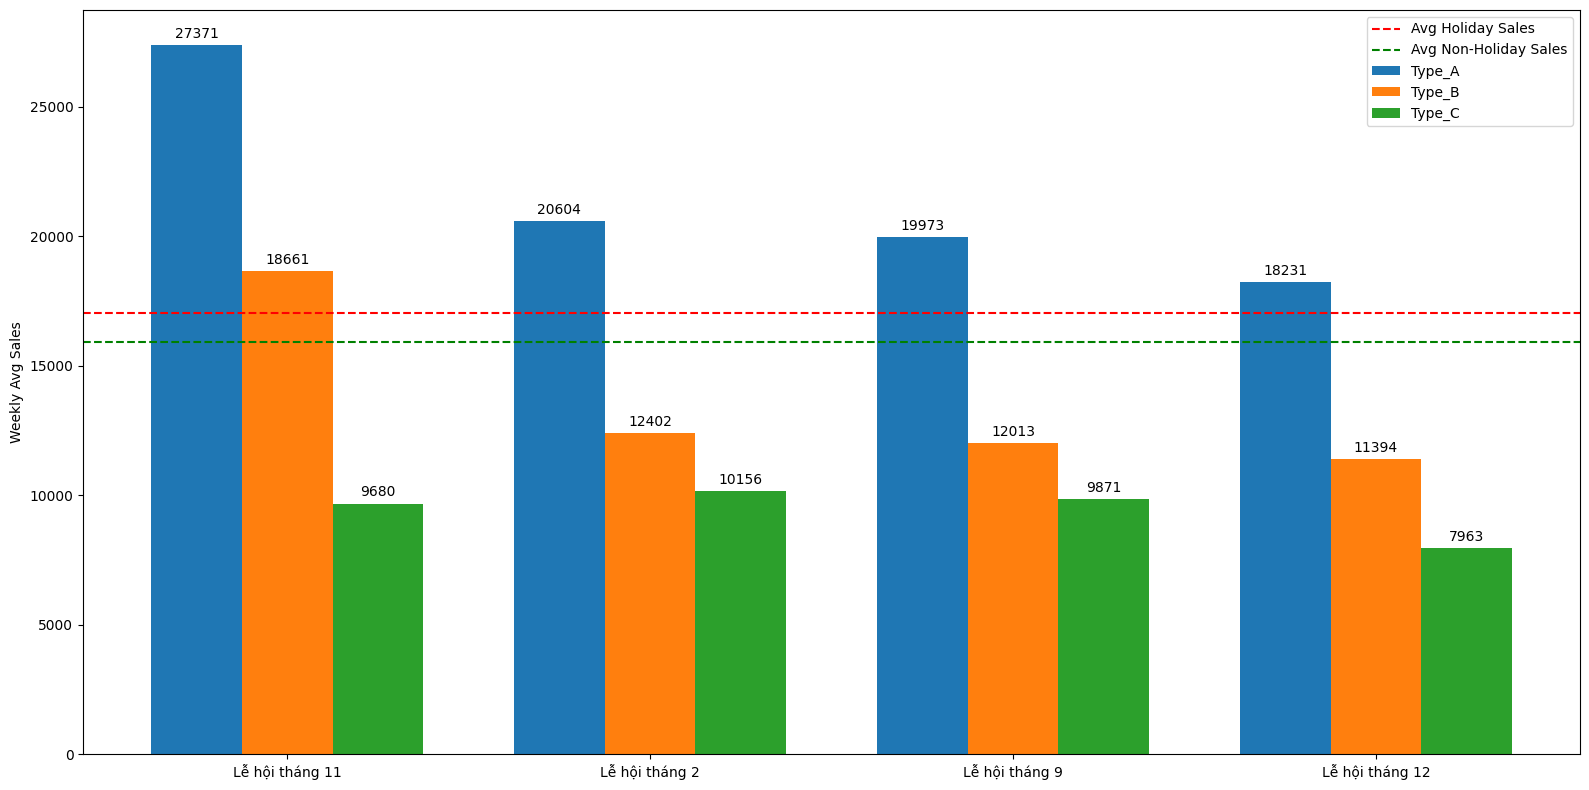

In [ ]:
x = np.arange(len(holidays))  # Vị trí nhãn
width = 0.25  # Độ rộng của cột

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x, B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Thiết lập nhãn
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(holidays)
ax.legend()

# Hiển thị giá trị trên cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Đường trung bình ngày lễ và ngày thường
holiday_avg = df_new[df_new['IsHoliday'] == True]['Weekly_Sales'].mean()
non_holiday_avg = df_new[df_new['IsHoliday'] == False]['Weekly_Sales'].mean()

plt.axhline(y=holiday_avg, color='r', linestyle='--', label='Avg Holiday Sales')
plt.axhline(y=non_holiday_avg, color='green', linestyle='--', label='Avg Non-Holiday Sales')

ax.legend()
fig.tight_layout()
plt.show()
plt.close()

**Nhận xét:**

**1. So sánh giữa các loại cửa hàng:**

* Cửa hàng Type_A luôn có doanh số cao nhất, gấp 1.5-2 lần so với Type_B và 2-3 lần so với Type_C
* Cửa hàng Type_B có doanh số trung bình
* Cửa hàng Type_C có doanh số thấp nhất trong tất cả các dịp lễ


**2. So sánh giữa các dịp lễ:**

* Lễ hội tháng 11 (Thanksgiving) mang lại doanh số cao nhất cho cả ba loại cửa hàng, đặc biệt là Type_A (27.371) và Type_B (18.661)
* Lễ hội tháng 2 (Super Bowl) có doanh số cao thứ hai, với Type_A đạt 20.604
* Lễ hội tháng 9 (Labor Day) và tháng 12 (Christmas) có doanh số thấp hơn

**3. Kết luận chung**

* Biểu đồ cho thấy hiệu quả kinh doanh khác nhau rõ rệt giữa các loại cửa hàng và các dịp lễ, với Thanksgiving là dịp mang lại doanh thu cao nhất và Type_A là loại hình cửa hàng hiệu quả nhất.

**2.2.2.3 Ảnh hưởng trong quan hệ giữa Size và Type**

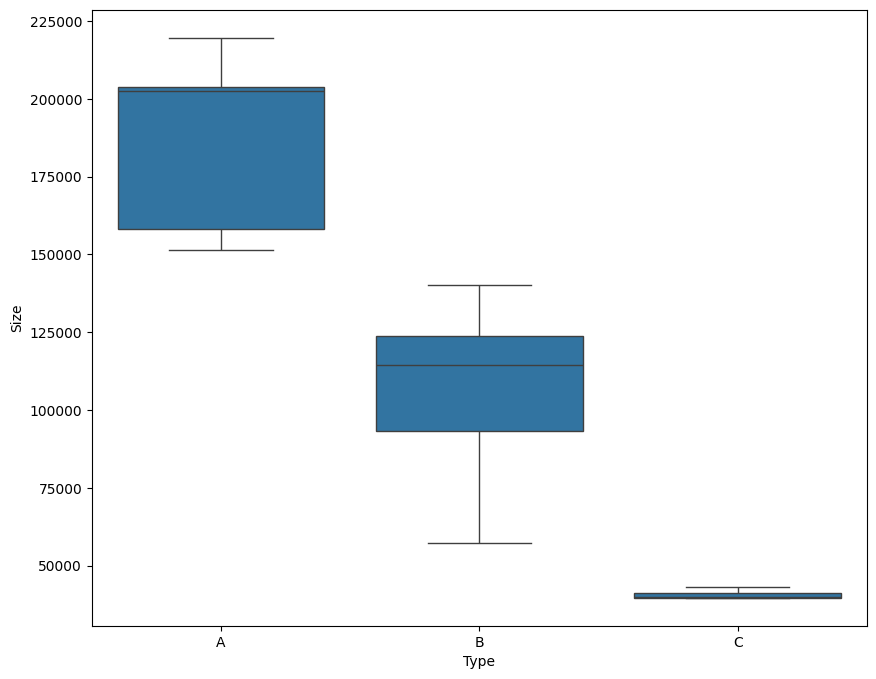

In [ ]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

Như đã phân tích ở trên thì ta thấy cửa hàng A có doanh số lớn nhất rồi tới loại B và cuối cùng là C  \
Điều này được chứng minh rõ qua biểu đồ ở trên, cho thấy rằng là cửa hàng có quy mô lớn hơn thì doanh số lớn hơn. \
Và ta có thể thấy dữ liệu đã dựa vào size để chia ra 3 type cửa hàng, vì gía trị size lớn nhất của C rồi đến giá trị size nhỏ nhất của B, giá trị size lớn nhất của B rồi đến giá trị size nhỏ nhất của A

##2.3. PHÂN TÍCH ĐA BIẾN CHO 3 TẬP DỮ LIỆU

**ĐỘ TƯƠNG QUAN CỦA CÁC BIẾN SỐ**

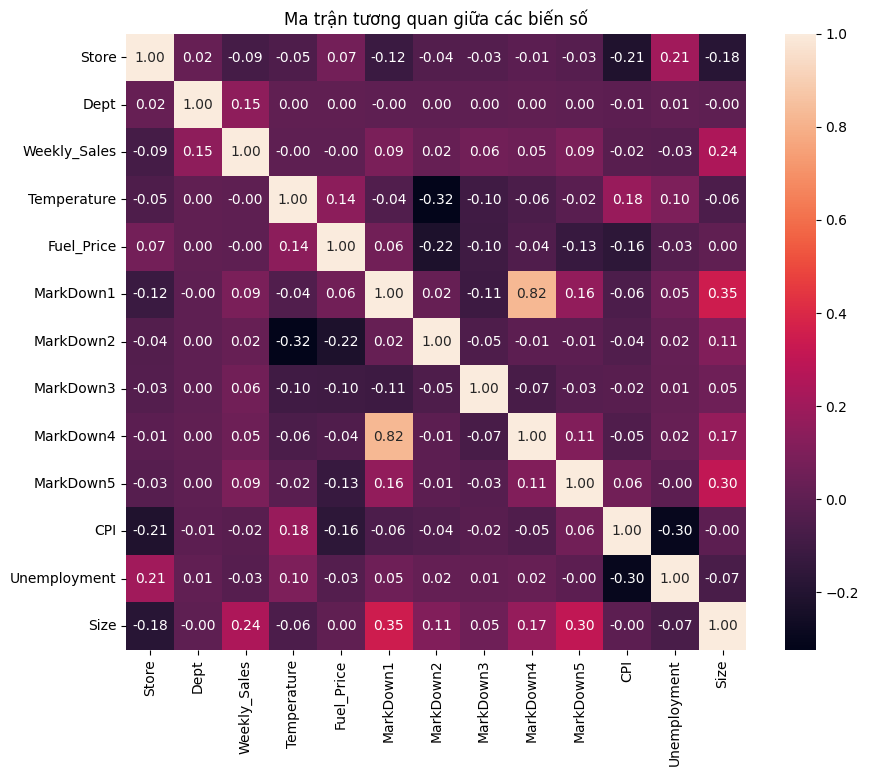

In [ ]:
correlation = df.select_dtypes(include='number').corr()

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()
plt.close()

**Nhận xét:**

**1.Nhận xét từng biến:**

**1.1 Weekly_Sales (Doanh số hàng tuần):**
* Tương quan yếu với các biến còn lại:

  * Tương quan dương yếu với biến Size (0.24) → Các cửa hàng lớn hơn có xu hướng có doanh số cao hơn.

  * Với các biến khác như Temperature, Fuel_Price, CPI, Unemployment: tương quan rất yếu hoặc gần như bằng 0 → các yếu tố này không ảnh hưởng nhiều trực tiếp đến doanh số.

**1.2 Temperature (Nhiệt độ):**
* Có tương quan dương nhẹ với CPI (0.18) và Fuel_Price (0.14) → Yếu tố thời tiết có ảnh hưởng nhẹ đến chi tiêu và giá nhiên liệu.

* Tương quan yếu hoặc âm rất nhẹ với các biến khác.

**1.3 Fuel_Price (Giá nhiên liệu):**
* Tương quan âm nhẹ với CPI (-0.16) → khi giá nhiên liệu tăng, chi tiêu tiêu dùng có thể giảm.

* Không có mối liên hệ đáng kể nào với các biến khác.

**1.4 CPI (Chỉ số giá tiêu dùng):**
* Tương quan âm tương đối với Unemployment (-0.30) → cho thấy mối quan hệ thường thấy trong kinh tế : khi thất nghiệp tăng, chi tiêu giảm (CPI giảm).

* Có mối tương quan yếu với các biến còn lại.

**1.5 Unemployment (Tỷ lệ thất nghiệp):**
* Tương quan âm trung bình với CPI (-0.30) như trên.

* Gần như không có tương quan với các biến còn lại, đặc biệt là với biến Weekly_Sales.

**1.6 Size (Quy mô cửa hàng):**
* Có tương quan yếu với Weekly_Sales (0.24) → các cửa hàng lớn thường bán được nhiều hơn.

* Không có mối tương quan đáng kể với các yếu tố khác.

**2.Kết luận chung**
* Không có mối tương quan mạnh giữa các biến

* Các biến vĩ mô như CPI, thất nghiệp... không ảnh hưởng mạnh mẽ đến doanh số.

* Quy mô cửa hàng là yếu tố có tương quan đáng kể nhất với doanh số → cần ưu tiên yếu tố này trong mô hình dự báo.

#**3. TIỀN XỬ LÍ DỮ LIỆU**

###3.1. Xử lí giá trị NULL

Đầu tiên chúng ta tìm xem những cột nào có giá trị NULL

In [ ]:
# Tính số lượng NULL của mỗi cột ở data train
count = df.isnull().sum()

# Tính phần trăm NULL trên mỗi cột
percentage = (count / len(df)) * 100

summary = pd.DataFrame({
    'Số lượng': count,
    'Phần trăm': percentage
})
summary

,Số lượng,Phần trăm
Store,0,0.000000
Dept,0,0.000000
Date,0,0.000000
Weekly_Sales,0,0.000000
IsHoliday,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845


In [ ]:
# Tính số lượng NULL của mỗi cột trong data test
count = df_test.isnull().sum()

# Tính phần trăm NULL trên mỗi cột
percentage = (count / len(df_test)) * 100

summary = pd.DataFrame({
    'Số lượng': count,
    'Phần trăm': percentage
})
summary

,Số lượng,Phần trăm
Store,0,0.000000
Dept,0,0.000000
Date,0,0.000000
IsHoliday,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,149,0.129493
MarkDown2,28627,24.879198
MarkDown3,9829,8.542203
MarkDown4,12888,11.200723


**Phương pháp xử lý giá trị NULL**

Chúng ta thấy có 5 cột có giá trị NULL là Markdown 1, Markdown 2, Markdown 3, Markdown 4, Markdown 5, đây là các loại giảm giá khác như được áp dụng bởi Walmart. Chúng ta sẽ xử lí các giá trị NULL này bằng cách điền khuyết thành giá trị 0. Điều này giả định rằng nếu không có thông tin về việc giảm giá, thì không có giảm giá

In [ ]:
# Điền khuyết bằng bằng 0 cho các giá trị MarkDown ở tập train
markdown_col = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_col] = df[markdown_col].fillna(0)


df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


Ngoài ra, trên tập df_test có các cột CPI, Unemployment có giá trị NaN, chúng ta xử lí bằng cách điền vào các giá trị này median của tập df

In [ ]:
# Điền khuyết bằng bằng 0 cho các giá trị MarkDown ở tập test
df_test[markdown_col] = df_test[markdown_col].fillna(0)

# Tính median trên tập train
median_cpi_train         = df['CPI'].median()
median_unemployment_train= df['Unemployment'].median()

# Dùng median của train để điền NaN cho df_test
df_test['CPI']            = df_test['CPI'].fillna(median_cpi_train)
df_test['Unemployment']   = df_test['Unemployment'].fillna(median_unemployment_train)

**Lí do vì sao dùng điền khuyết:**
* Có một số phương pháp xử lí giá trị NULL khác như loại bỏ, nội suy nhưng không phù hợp với bộ dữ liệu này vì:
 * Loại bỏ: tỷ lệ NaN trong các cột này rất cao, việc loại bỏ sẽ làm mất đi một lượng lớn dữ liệu quan trọng giảm đáng kể kích thước bộ dữ liệu và ảnh hưởng đến độ tin cậy của mô hình
 * Nội suy: các giá trị Markdown không tuân theo một qui luật cụ thể nào và ít phụ thuộc vào các biến khác nên dùng nội suy sẽ có tính chính xác thấp


###3.2. Xử lí outliers

In [ ]:
num = (df['Weekly_Sales'] <= 0).sum()

# Tổng số hàng
row = len(df)

# Tính phần trăm
percentage = (num / row) * 100

print(f"Số lượng giá trị Weekly_Sales < 0: {num}")
print(f"Tỷ lệ phần trăm: {percentage:.2f}%")

Số lượng giá trị Weekly_Sales < 0: 1358
Tỷ lệ phần trăm: 0.32%


Chúng ta xem có bao nhiêu giá trị âm hoặc bằng 0 ở cột Weekly_Sales. Như đã nói ở trên, việc có giá trị âm hoặc bằng 0 ở cột giá trị Weekly_Sales là bất hợp lí. Vì vậy chúng ta sẽ xóa những cột này vì doanh thu không thể âm, nếu bằng 0 thì có thể đó là lỗi nhập liệu. Tỉ lệ phần trăm giá trị Weekly_Sales âm hoặc bằng 0 chỉ là 0,32%, do đó sẽ không gây ảnh hưởng lớn đến tập dữ liệu

In [ ]:
df = df.loc[df['Weekly_Sales'] >= 0]

df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


Chúng ta xem ở mỗi cột có bao nhiêu outliers. Ở đây chúng ta sẽ tìm bằng IQR, phương pháp IQR phát hiện outlier bằng cách tính hai phần vị Q1 (25%) và Q3 (75%) của tập dữ liệu, sau đó xác định khoảng liên phần vị IQR = Q3 – Q1, mọi giá trị nằm dưới Q1 – 1,5 * IQR hoặc trên Q3 + 1,5 * IQR được xem là outlier

In [ ]:
# Hàm lọc giá trị outliers
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Lấy danh sách các cột số trong df
col = df.select_dtypes(include=['number']).columns

# Lưu kết quả
summary = {}

# Lặp qua từng cột số và tìm outliers
for column in col:
    outliers = find_outliers_IQR(df, column)
    num = len(outliers)
    percentage = (num / len(df)) * 100
    summary[column] = {'Số lượng': num, 'Phần trăm': percentage}

# Tạo DataFrame từ summary
outlier_df = pd.DataFrame.from_dict(summary, orient='index')

# Hiển thị DataFrame
outlier_df

,Số lượng,Phần trăm
Store,0,0.000000
Dept,0,0.000000
Weekly_Sales,35381,8.418335
Temperature,67,0.015942
Fuel_Price,0,0.000000
MarkDown1,56183,13.367834
MarkDown2,101695,24.196676
MarkDown3,84436,20.090177
MarkDown4,78897,18.772262
MarkDown5,40334,9.596821


**Phương pháp xử lí giá trị Outliers:**
  * Cột Temparatue: Biến này có một số outliers ở cả hai phía, điều này có thể làm sai lệch giá trị trung bình. Chúng ta sẽ thay thế các giá trị này bằng trung vị (median) để loại bỏ outliers mà không làm thay đổi đáng kể phân bố của dữ liệu
  * Cột Unemployment: Biến này có phân bố lệch trái với nhiều outliers ở giá trị cao nhưng tỉ lệ giá trị outlier thấp. Chúng ta thay thế các giá trị bằng cách chỉnh giá trị vượt quá giá trị cho phép thành giá trị ở ngay biên
  * Cột Weekly_Sales, Markdown 1-5 mặc dù cũng có giá trị outlier, tuy nhiên các mô hình sử dụng (Random Forest, XGBoost) ít nhạy cảm với outlier nên chúng ta không xử lí

In [ ]:
# Lưu các giá trị trước khi biến đổi dữ liệu
df_original = df[['Temperature', 'Unemployment']].copy()

# Thay thế outliers 'Temperature' bằng trung vị
median_temp = df['Temperature'].median()
q1_temp = df['Temperature'].quantile(0.25)
q3_temp = df['Temperature'].quantile(0.75)
iqr_temp = q3_temp - q1_temp

upper_bound_temp = q3_temp + 1.5 * iqr_temp
lower_bound_temp = q1_temp - 1.5 * iqr_temp

df.loc[(df['Temperature'] > upper_bound_temp) | (df['Temperature'] < lower_bound_temp), 'Temperature'] = median_temp
df_test.loc[(df_test['Temperature'] > upper_bound_temp) | (df_test['Temperature'] < lower_bound_temp),'Temperature'] = median_temp

# Thay thế outliers 'Unemployment' bằng cách cap ở hai đầu
q1_unemp = df['Unemployment'].quantile(0.25)
q3_unemp = df['Unemployment'].quantile(0.75)
iqr_unemp = q3_unemp - q1_unemp

lower_bound_unemp = q1_unemp - 1.5 * iqr_unemp
upper_bound_unemp = q3_unemp + 1.5 * iqr_unemp

df['Unemployment'] = df['Unemployment'].clip(lower=lower_bound_unemp,
                                             upper=upper_bound_unemp)
df_test['Unemployment'] = df_test['Unemployment'].clip(lower=lower_bound_unemp,
                                                       upper=upper_bound_unemp)

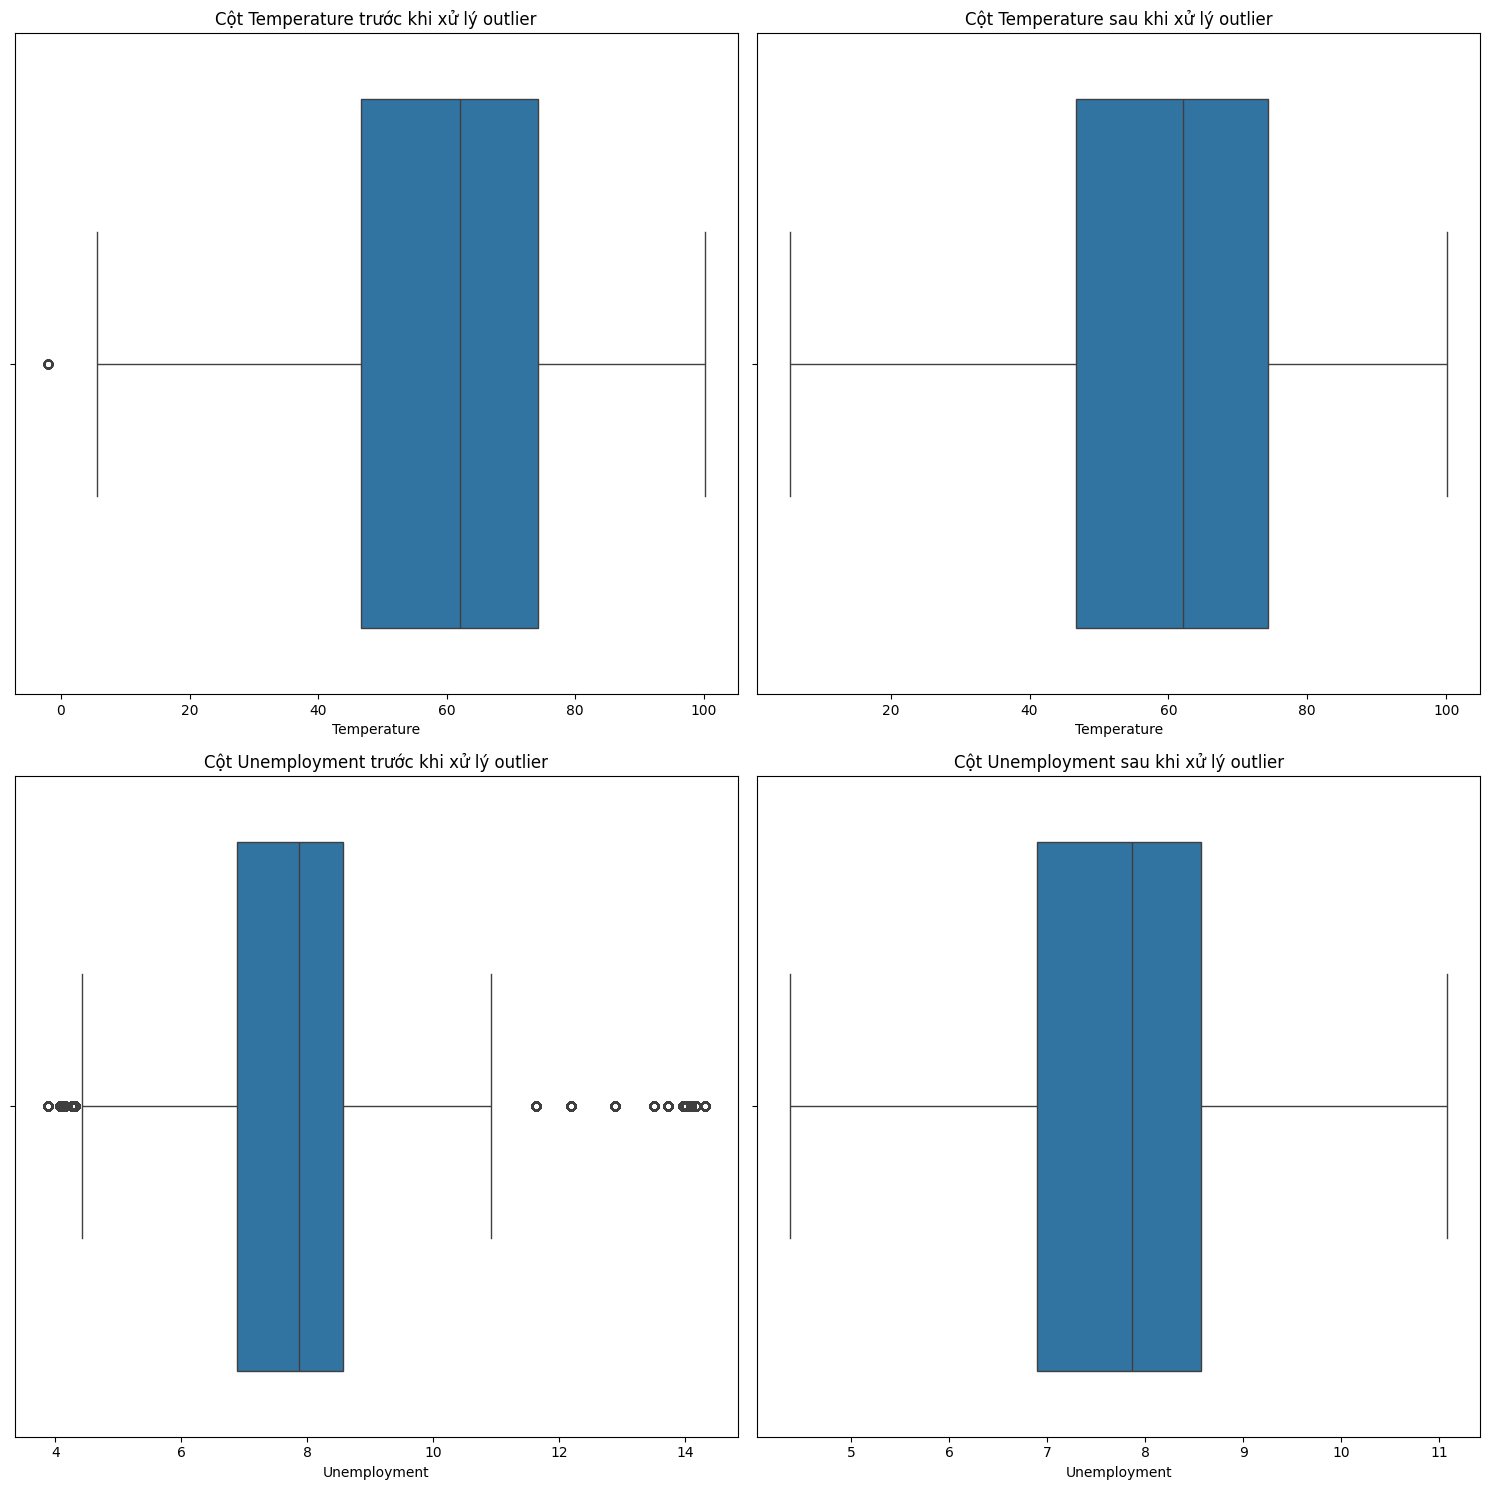

In [ ]:
# Vẽ biểu đồ trước và sau khi biến đổi
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Boxplot Temperature
sns.boxplot(x=df_original['Temperature'], ax=axes[0, 0])
axes[0, 0].set_title('Cột Temperature trước khi xử lý outlier')

sns.boxplot(x=df['Temperature'], ax=axes[0, 1])
axes[0, 1].set_title('Cột Temperature sau khi xử lý outlier')

# Boxplot Unemployment
sns.boxplot(x=df_original['Unemployment'], ax=axes[1, 0])
axes[1, 0].set_title('Cột Unemployment trước khi xử lý outlier')

sns.boxplot(x=df['Unemployment'], ax=axes[1, 1])
axes[1, 1].set_title('Cột Unemployment sau khi xử lý outlier')

plt.tight_layout()
plt.show()
plt.close()

**Phân tích giá trị sau khi xử lý**

Sau khi xử lí giá trị outliers, chúng ta thấy giá trị của các cột thay đổi như sau:
  * Cột Temparatue: Khoảng giá trị giảm xuống, phân bố giá trị tập trung hơn quanh giá trị trung tâm, phân bố giá trị ít biến động hơn giữa các điểm liên tiếp
  * Cột Unemployment: Phân bố giá trị ít lệch trái hơn, tập trung về giá trị trung tâm, dù vậy dữ liệu vẫn mang tính đại diện và mô hình ít bị ảnh hưởng hơn bởi các giá trị outliers

###3.3. Mã hóa dữ liệu

Trong các cột dữ liệu, có cột Type gồm các giá trị: A, B, C. Ta cần chuyển các giá trị này thành số để mô hình có thể hiểu được. Chúng ta sẽ sử dụng Label encoding. Mặc dù có những mô hình hiểu nhầm sự phân cấp giữa các giá trị số nhưng những mô hình trong bài (Random Forest, XGBoost, LightGBM) thì không có vấn đề

In [ ]:
# Dùng LabelEncoding trên cột Type
le = LabelEncoder()

df['Type'] = le.fit_transform(df['Type'])
df_test['Type'] = le.transform(df_test['Type'])

df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


Chúng ta chuyển giá trị IsHoliday trong df thành dạng số 0/1 thay vì True/False giúp đảm bảo tính nhất quán, tương thích và hiệu quả trong xử lý và huấn luyện mô hình

In [ ]:
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x else 0)

df_test['IsHoliday'] = df_test['IsHoliday'].apply(lambda x: 1 if x else 0)

###3.4. Chuẩn hóa dữ liệu

Chúng ta sẽ chuẩn hóa dữ liệu một số biến trong dữ liệu, mục đích là để đưa các biến số về một phạm vi cụ thể, tránh tình trạng các biến có thang đo lớn hơn chi phối mô hình học máy, giúp mô hình hoạt động chính xác hơn

In [ ]:
# Khởi tạo các scaler
standard_scaler = StandardScaler()
minmax_scaler   = MinMaxScaler()

# Các cột cần scale với từng loại scaller
grp_standard = ['CPI', 'Fuel_Price', 'Size', 'Temperature', 'Unemployment']
grp_minmax   = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Scaller cho df
df[grp_minmax]       = minmax_scaler.fit_transform(df[grp_minmax])
df[grp_standard]     = standard_scaler.fit_transform(df[grp_standard])

# Scaller cho df_test
df_test[grp_minmax]  = minmax_scaler.transform(df_test[grp_minmax])
df_test[grp_standard]= standard_scaler.transform(df_test[grp_standard])


# Xem dữ liệu sau khi chuẩn hóa
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,-0.965231,-1.720502,0.0,0.002536,0.000205,0.0,0.0,1.018435,0.183839,0,0.238806
1,1,1,2010-02-12,46039.49,1,-1.171399,-1.772844,0.0,0.002536,0.000205,0.0,0.0,1.022159,0.183839,0,0.238806
2,1,1,2010-02-19,41595.55,0,-1.094357,-1.846995,0.0,0.002536,0.000205,0.0,0.0,1.023358,0.183839,0,0.238806
3,1,1,2010-02-26,19403.54,0,-0.730850,-1.744492,0.0,0.002536,0.000205,0.0,0.0,1.024137,0.183839,0,0.238806
4,1,1,2010-03-05,21827.90,0,-0.737903,-1.604913,0.0,0.002536,0.000205,0.0,0.0,1.024916,0.183839,0,0.238806


**Giải thích việc chuẩn hóa dữ liệu với các biến**

1. Min-Max Scaling:

* Phân bố: Các cột Markdown 1-5 có rất nhiều giá trị bằng 0 do việc điền NULL
* Lý do chọn : Min-Max Scaling được sử dụng để đưa dữ liệu về một khoảng cố định, thường là từ 0 đến 1. Điều này đặc biệt hữu ích cho các biến có nhiều giá trị bằng 0, làm cho giá trị không bị nhiễu bởi phân phối không đối xứng, giúp cho việc so sánh và phân tích dễ dàng hơn

2. Standard Scaling:

* Phân bố: Các cột CPI, Fuel_Price, Size, Temperature, Unemployment có phân bố đa dạng
* Lý do chọn : Standard Scaling là lựa chọn phù hợp cho các biến này vì nó đưa các feature về cùng một chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 1, làm đồng bộ hóa và bảo đảm công bằng giữa các feature


#**4. FEATURE ENGINEERING**

###4.1. Loại bỏ những đặc trưng không có nhiều giá trị dự đoán

In [ ]:
# Xem trên các cột tỉ lệ giá trị riêng biệt trên tổng giá trị là bao nhiêu
result = {'Cột': [], 'Số lượng giá trị riêng biệt': [], 'Tỉ lệ': []}

# Lấy số liệu ở các cột
for col in df.columns:
    n_unique = df[col].nunique()
    ratio = n_unique / len(df)

    result['Cột'].append(col)
    result['Số lượng giá trị riêng biệt'].append(n_unique)
    result['Tỉ lệ'].append(ratio)

df_result = pd.DataFrame(result)

# In kết quả
df_result

,Cột,Số lượng giá trị riêng biệt,Tỉ lệ
0,Store,45,0.000107
1,Dept,81,0.000193
2,Date,143,0.000340
3,Weekly_Sales,358786,0.853673
4,IsHoliday,2,0.000005
5,Temperature,3527,0.008392
6,Fuel_Price,892,0.002122
7,MarkDown1,2278,0.005420
8,MarkDown2,1499,0.003567
9,MarkDown3,1662,0.003954


Chúng ta thấy trong dữ liệu có các cột Store, Dept có thể là cột định danh vì các giá trị này ghi thứ tự cửa hàng, phòng ban đang tính toán. Nhưng sau khi kiểm tra chúng ta thấy Store chỉ có 45 giá trị riêng biệt, Dept có 81 giá trị riêng biệt. Vì vậy không nên xóa các cột này vì tỉ lệ giá trị riêng biệt trên toàn bộ dữ liệu quá thấp. Trong dữ liệu cũng không có cột nào chỉ nhận một giá trị nên chúng ta cũng sẽ không xóa các cột khác

###4.2. Tạo mới đặc trưng

Chúng ta tách cột Date thành 3 cột mới: Day, Month, Year. Điều này giúp xử lí các dữ liệu theo khoảng ngày, tháng, năm cụ thể dễ dàng hơn. Việc tách ra cũng giúp cải thiện độ chính xác mô hình vì có thể tìm ra các xu hướng biến động của giá trị theo mốc thời gian cụ thể. Chúng ta cũng sẽ thêm đặc trưng tuần trong năm, vào dữ liệu. Điều này giúp mô hình nhìn ra mối quan hệ danh số theo tuần trong năm, làm dự đoán chuẩn xác hơn

In [ ]:
# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
df['Date'] = pd.to_datetime(df['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Tách cột 'Date' thành 'Day', 'Month', 'Year'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df_test['Day'] = df_test['Date'].dt.day
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year

# Thêm đặc trưng tuần trong năm vào dữ liệu
df['Week'] = df['Date'].dt.isocalendar().week

df_test['Week'] = df_test['Date'].dt.isocalendar().week

# Xem lại dữ liệu sau khi biến đổi
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,Week
0,1,1,2010-02-05,24924.50,0,-0.965231,-1.720502,0.0,0.002536,0.000205,0.0,0.0,1.018435,0.183839,0,0.238806,5,2,2010,5
1,1,1,2010-02-12,46039.49,1,-1.171399,-1.772844,0.0,0.002536,0.000205,0.0,0.0,1.022159,0.183839,0,0.238806,12,2,2010,6
2,1,1,2010-02-19,41595.55,0,-1.094357,-1.846995,0.0,0.002536,0.000205,0.0,0.0,1.023358,0.183839,0,0.238806,19,2,2010,7
3,1,1,2010-02-26,19403.54,0,-0.730850,-1.744492,0.0,0.002536,0.000205,0.0,0.0,1.024137,0.183839,0,0.238806,26,2,2010,8
4,1,1,2010-03-05,21827.90,0,-0.737903,-1.604913,0.0,0.002536,0.000205,0.0,0.0,1.024916,0.183839,0,0.238806,5,3,2010,9


Chúng ta sẽ tạo đặc tưng mới Total_Markdown là tổng tất cả giảm giá của Markdown từ 1 - 5 để biết mức độ giảm giá tổng thể

In [ ]:

df['Total_Markdown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']

df_test['Total_Markdown'] = df_test['MarkDown1'] + df_test['MarkDown2'] + df_test['MarkDown3'] + df_test['MarkDown4'] + df_test['MarkDown5']


df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,Week,Total_Markdown
0,1,1,2010-02-05,24924.50,0,-0.965231,-1.720502,0.0,0.002536,0.000205,...,0.0,1.018435,0.183839,0,0.238806,5,2,2010,5,0.002742
1,1,1,2010-02-12,46039.49,1,-1.171399,-1.772844,0.0,0.002536,0.000205,...,0.0,1.022159,0.183839,0,0.238806,12,2,2010,6,0.002742
2,1,1,2010-02-19,41595.55,0,-1.094357,-1.846995,0.0,0.002536,0.000205,...,0.0,1.023358,0.183839,0,0.238806,19,2,2010,7,0.002742
3,1,1,2010-02-26,19403.54,0,-0.730850,-1.744492,0.0,0.002536,0.000205,...,0.0,1.024137,0.183839,0,0.238806,26,2,2010,8,0.002742
4,1,1,2010-03-05,21827.90,0,-0.737903,-1.604913,0.0,0.002536,0.000205,...,0.0,1.024916,0.183839,0,0.238806,5,3,2010,9,0.002742


Chúng ta tạo đặc trưng mới đánh dấu các tuần lễ hội trong năm vì các tuần lễ hội thường có mức tiêu thụ đột biến do khuyến mãi, mua sắm quà tặng, nhu cầu tăng cao, giúp mô hình không cần phải tự học chuỗi thời gian rời rạc, cải thiện khả năng dự báo các đỉnh doanh số

In [ ]:
# Thêm biến đánh dấu các tuần lễ hội trong năm (Super Bowl ở tuần 6, Labor Day ở tuần 36,
# Thanksgiving ở tuần 47, Christmas ở tuần 52)
df['SuperBowlWeek']   = (df['Week'] == 6).astype(int)
df['LaborDay']        = (df['Week'] == 36).astype(int)
df['Thanksgiving']    = (df['Week'] == 47).astype(int)
df['Christmas']       = (df['Week'] == 52).astype(int)

df_test['SuperBowlWeek']   = (df_test['Week'] == 6).astype(int)
df_test['LaborDay']        = (df_test['Week'] == 36).astype(int)
df_test['Thanksgiving']    = (df_test['Week'] == 47).astype(int)
df_test['Christmas']       = (df_test['Week'] == 52).astype(int)

###4.3. Chọn lựa đặc trưng

Đầu tiên chúng ta sử dụng ma trận tương quan nhưng không có biến mục tiêu, mục đích là loại các feature có mức độ đa cộng tuyển cao, những feature có giá trị lớn hơn một ngưỡng nhất định

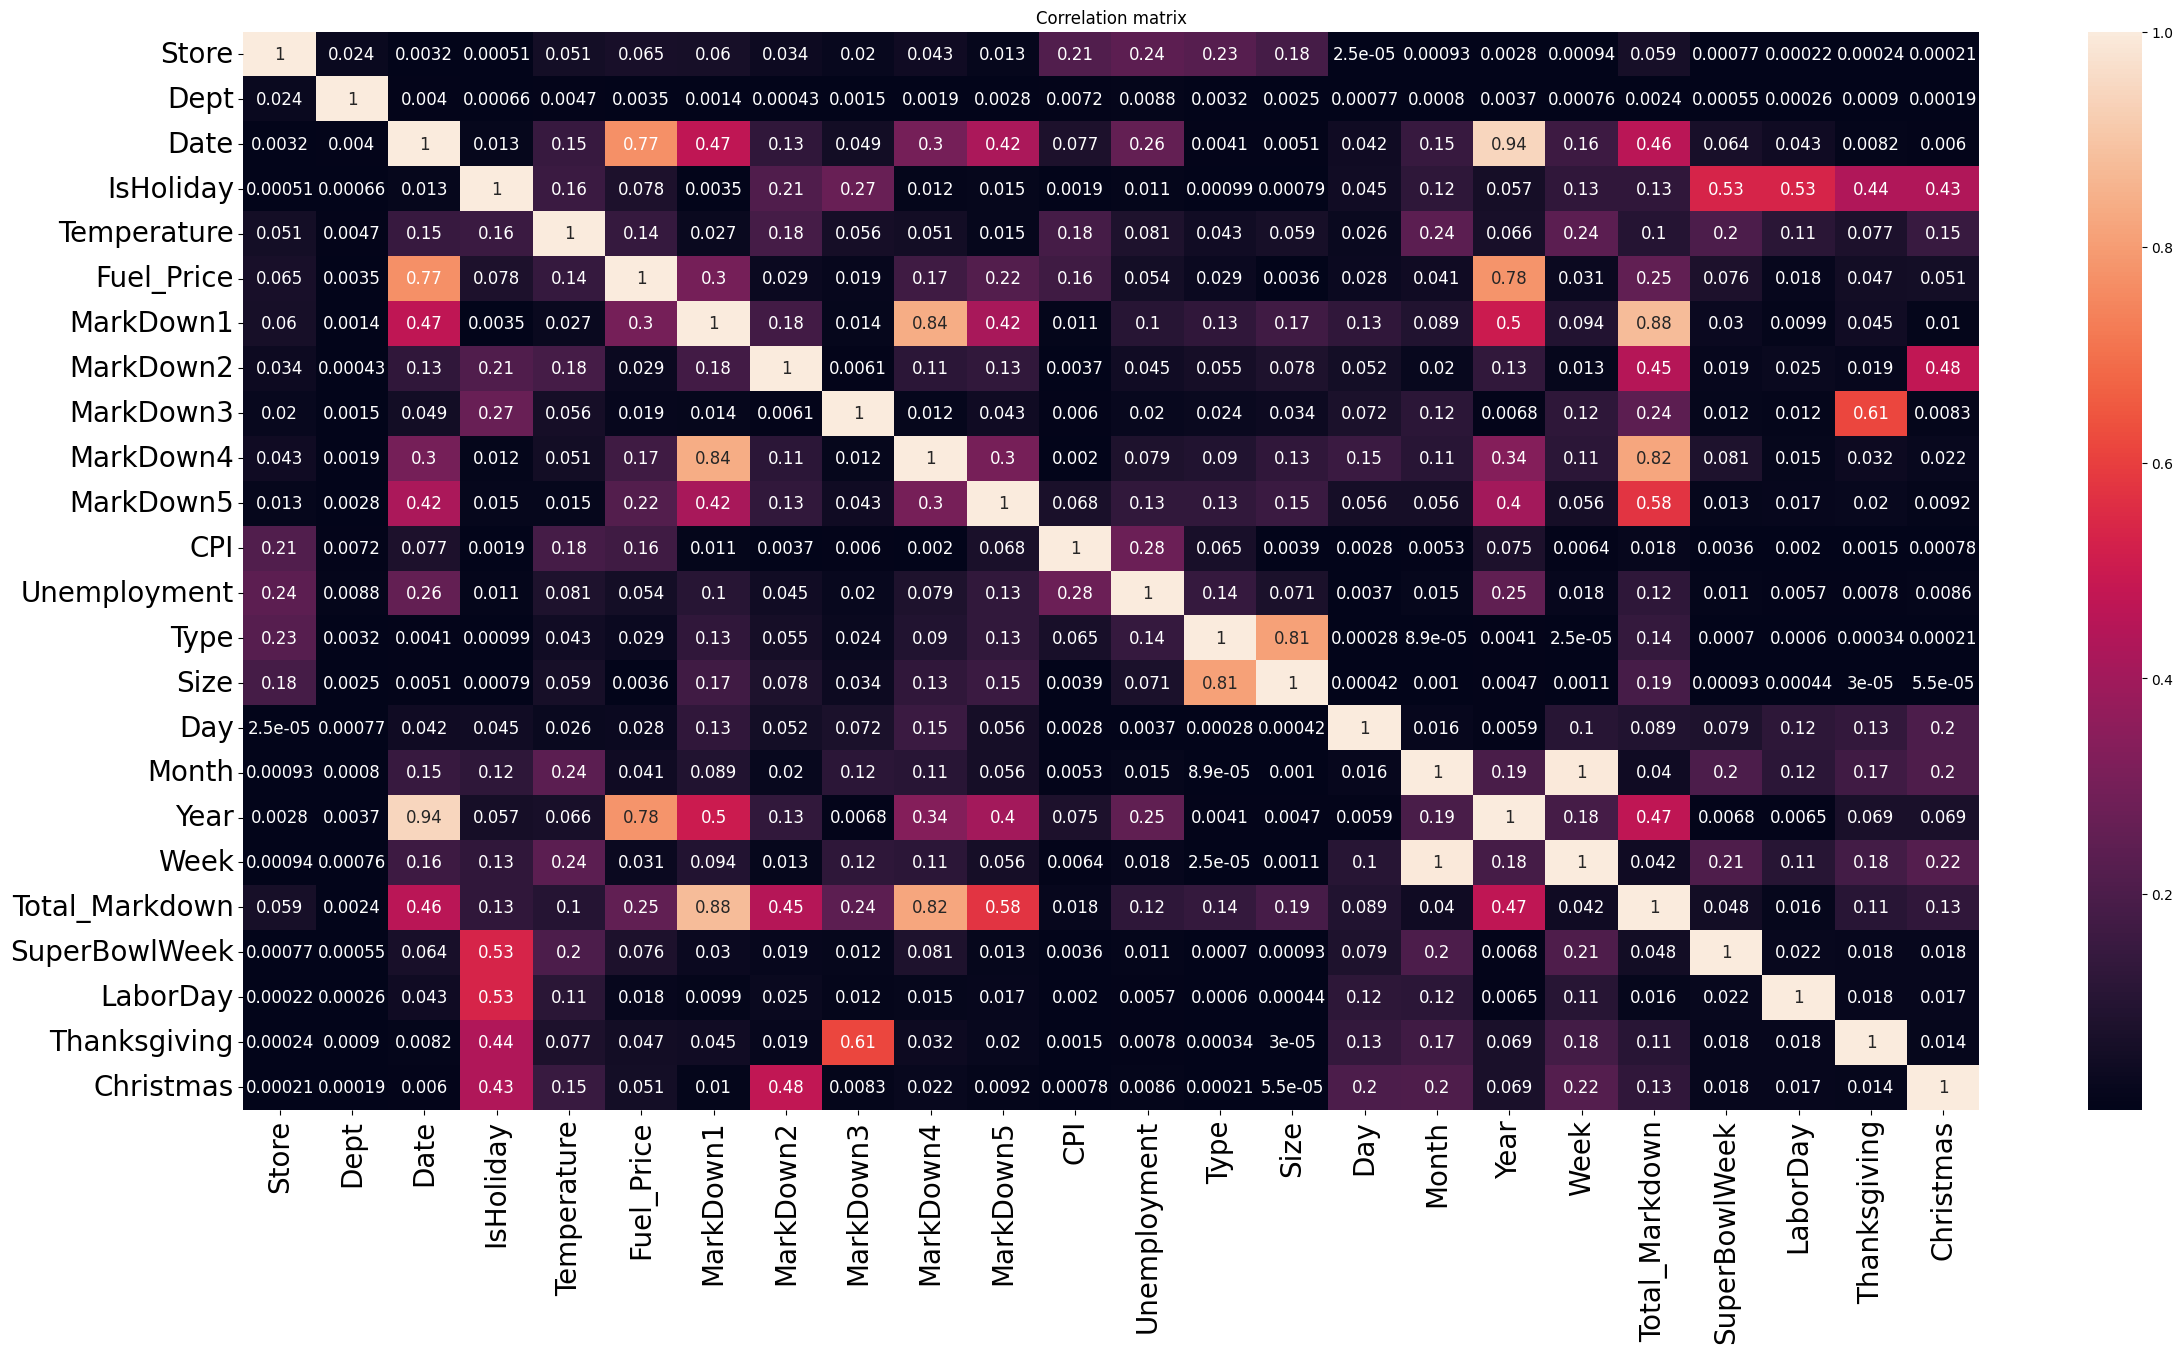

In [ ]:
# Lấy X
X = df.drop('Weekly_Sales', axis=1)

# Tính ma trận tương quan
corr = X.corr().abs()

# Vẽ heatmap
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(corr,annot=True, annot_kws={'size':12})
plt.title('Correlation matrix')
plt.show()
plt.close()

Dựa vào ma trận tương quan, chúng ta có những nhận xét sau:
* Hai cột Week và Month có độ tương quan cao do thông tin của Week cũng có trong Month, vì vậy chúng ta sẽ bỏ cột Month đi
* Tương tự với Size và Type, ở đây chúng ta bỏ cột Type
* Tương tự với Year và Date, ở đây chúng ta bỏ cột Date
* Các biến MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 có tương quan khá lớn với một số feature khác nên chúng ta cũng bỏ các cột này đi

In [ ]:
X.drop(columns=['Month','Type','Date','MarkDown1','MarkDown2' ,'MarkDown3' ,'MarkDown4' ,'MarkDown5'], inplace=True)

Sau đó để hiểu hơn về độ quan trọng của các feature, chúng ta sẽ thử train trên một model XGBoost, tuy nhiên chúng ta sẽ thử xáo trộn các giá trị trong feature khi train 10 lần, xem sai số dự đoán được tăng nhiều hay ít. Từ đó sẽ biết được sự đóng góp của từng feature vào tính chính xác mô hình

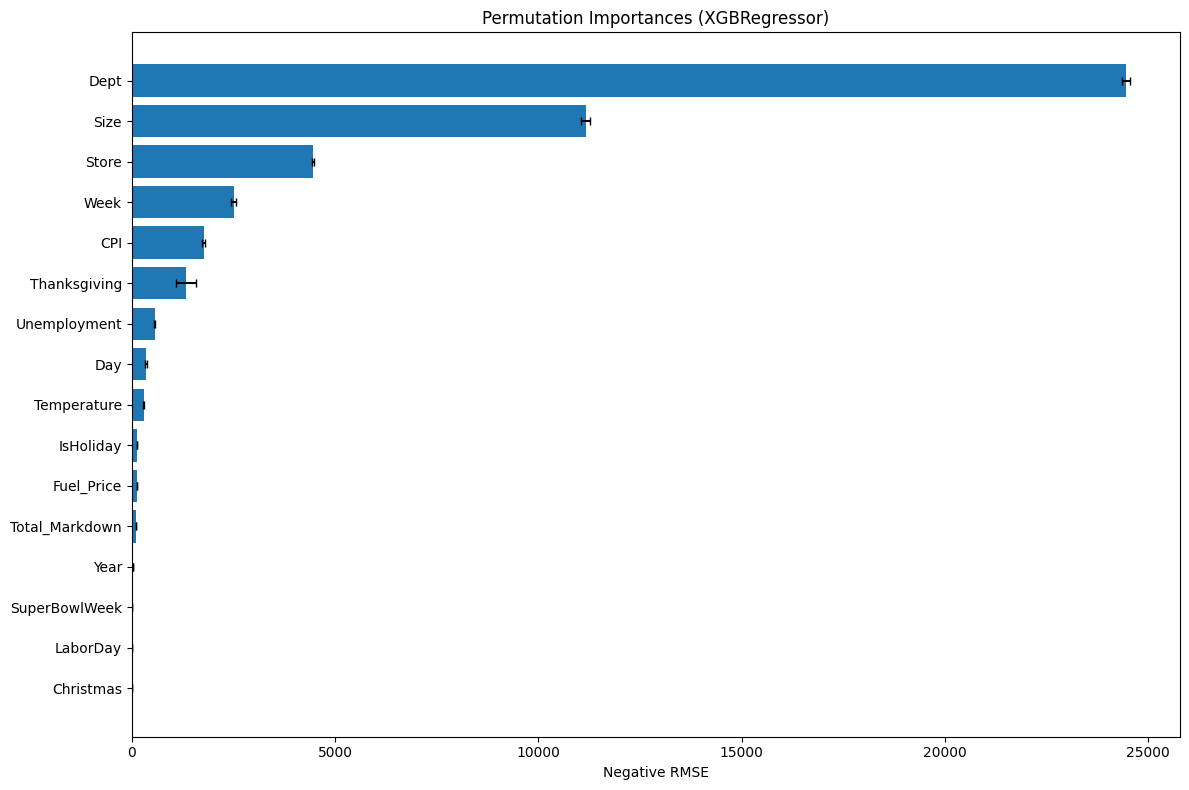

In [ ]:
# Tách X, y
y = df['Weekly_Sales']

# Chia tập test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Dùng permutation_importance của sk_learn để kiểm tra mức độ quan trọng khi thay đổi các test
perm_res = permutation_importance(
    estimator=xgb,
    X=X_test,
    y=y_test,
    scoring='neg_root_mean_squared_error',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_series = pd.Series(
    perm_res.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

perm_std = pd.Series(
    perm_res.importances_std,
    index=X_test.columns
).loc[perm_series.index]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.barh(
    y=perm_series.index,
    width=perm_series.values,
    xerr=perm_std.values,
    align='center',
    ecolor='black',
    capsize=3
)
plt.gca().invert_yaxis()
plt.xlabel('Negative RMSE')
plt.title('Permutation Importances (XGBRegressor)')
plt.tight_layout()
plt.show()

Chúng ta có thể thấy rằng 3 features: Dept, Size, Store có ảnh hưởng lớn đến mô hình. Có nghĩa là doanh thu của một cửa hàng phụ thuộc lớn vào tên cửa hàng, quy mô cửa hàng, các lĩnh vực cửa hàng nhắm tới. Một số features cũng có ảnh hưởng đến doanh thu cửa hàng nhưng không đáng kể

Sau khi xem xét độ quan trọng của các feature theo từng phương pháp. Chúng ta sẽ lấy các biến sau để dự đoán

In [ ]:
features = ['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year', 'Day']

features

['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year', 'Day']

#**5. XÂY DỰNG MÔ HÌNH**

In [ ]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Day,Month,Year,Week,Total_Markdown,SuperBowlWeek,LaborDay,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,0,-0.965231,-1.720502,0.0,0.002536,0.000205,...,0.238806,5,2,2010,5,0.002742,0,0,0,0
1,1,1,2010-02-12,46039.49,1,-1.171399,-1.772844,0.0,0.002536,0.000205,...,0.238806,12,2,2010,6,0.002742,1,0,0,0
2,1,1,2010-02-19,41595.55,0,-1.094357,-1.846995,0.0,0.002536,0.000205,...,0.238806,19,2,2010,7,0.002742,0,0,0,0
3,1,1,2010-02-26,19403.54,0,-0.730850,-1.744492,0.0,0.002536,0.000205,...,0.238806,26,2,2010,8,0.002742,0,0,0,0
4,1,1,2010-03-05,21827.90,0,-0.737903,-1.604913,0.0,0.002536,0.000205,...,0.238806,5,3,2010,9,0.002742,0,0,0,0


Chúng ta sẽ chia tập train, test theo tỉ lệ 85:15

In [ ]:
# Tách X, y
X = df[features]
y = df['Weekly_Sales']

# Chia tập test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Hàm tính RMSE
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# Hàm tính WMAE
def WMAE(dataset, y_true, y_pred):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1).values

    return mean_absolute_error(y_true, y_pred, sample_weight=weights)

In [ ]:
# Hàm tính MAE
def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
# Hàm tính MSE
def MSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

##5.1 Thử các mô hình ban đầu

Random Forest là một thuật toán học máy sử dụng nhiều cây quyết định để đưa ra dự đoán. Mỗi cây được huấn luyện trên một tập dữ liệu con được lấy mẫu ngẫu nhiên từ tập dữ liệu gốc và sử dụng một tập con các đặc trưng tại mỗi nút phân chia. Kết quả dự đoán cuối cùng được xác định bằng cách tổng hợp kết quả từ tất cả các cây

In [ ]:
# Khởi tạo mô hình RandomForest
rf = RandomForestRegressor(random_state = 42, n_jobs=-1)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rf.predict(X_test)

# Tính RMSE, MAE

mse_rf = MSE(y_test, y_pred)
mae_rf  = MAE(y_test, y_pred)
rmse_rf = RMSE(y_test, y_pred)
wmae_rf = WMAE(X_test, y_test, y_pred)

print('MSE (Random Forest đơn giản):', mse_rf)
print('MAE (Random Forest đơn giản):', mae_rf)
print('RMSE (Random Forest đơn giản):', rmse_rf)
print('WMAE (Random Forest đơn giản):', wmae_rf)

MSE (Random Forest đơn giản): 8667219.435998527
MAE (Random Forest đơn giản): 1234.3118727947588
RMSE (Random Forest đơn giản): 2944.0141704819507
WMAE (Random Forest đơn giản): 1370.9179429395097


XGBoost (Extreme Gradient Boosting) là một thuật toán tăng cường gradient được thiết kế để tối ưu hóa tốc độ và hiệu suất. Nó xây dựng các cây quyết định tuần tự, mỗi cây mới cố gắng sửa lỗi của các cây trước bằng cách tối thiểu hóa hàm mất mát thông qua phương pháp gradient descent. XGBoost sử dụng các kỹ thuật như regularization để ngăn chặn overfitting và hỗ trợ tính toán song song, giúp xử lý hiệu quả các tập dữ liệu lớn. XGBoost là một mô hình rất mạnh trong việc dự đoán doanh thu, đã được chứng minh qua các kì thi

In [ ]:
# Khởi tạo mô hình
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Huấn luyện mô hình
xgb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = xgb.predict(X_test)

mse_xgb = MSE(y_test, y_pred)
mae_xgb  = MAE(y_test, y_pred)
rmse_xgb = RMSE(y_test, y_pred)
wmae_xgb = WMAE(X_test, y_test, y_pred)

print('MSE (XGBoost đơn giản):', mse_xgb)
print('MAE (XGBoost đơn giản):', mae_xgb)
print('RMSE (XGBoost đơn giản):', rmse_xgb)
print('WMAE (XGBoost đơn giản):', wmae_xgb)

MSE (XGBoost đơn giản): 26150054.358309437
MAE (XGBoost đơn giản): 2954.912546270975
RMSE (XGBoost đơn giản): 5113.712385176686
WMAE (XGBoost đơn giản): 3081.078741242938


LightGBM (Light Gradient Boosting Machine) là một thuật toán học máy nổi bật với khả năng xử lý nhanh chóng và hiệu quả trên các tập dữ liệu lớn. Trong dự đoán doanh thu, LightGBM phù hợp vì khả năng xử lý dữ liệu phức tạp, bao gồm yếu tố mùa vụ, xu hướng và ảnh hưởng bên ngoài. Mô hình này có thể mô hình hóa mối quan hệ phi tuyến tính và tương tác giữa nhiều đặc trưng, giúp cải thiện độ chính xác trong dự đoán

In [ ]:
# Khởi tạo mô hình
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# Huấn luyện mô hình
lgbm.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = lgbm.predict(X_test)

# Tính RMSE, MAE
mse_lgbm = MSE(y_test, y_pred)
mae_lgbm  = MAE(y_test, y_pred)
rmse_lgbm = RMSE(y_test, y_pred)
wmae_lgbm = WMAE(X_test, y_test, y_pred)

print('MSE (LightGBM đơn giản):', mse_lgbm)
print('MAE (LightGBM đơn giản):', mae_lgbm)
print('RMSE (LightGBM đơn giản):', rmse_lgbm)
print('WMAE (LightGBM đơn giản):', wmae_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 357242, number of used features: 7
[LightGBM] [Info] Start training from score 16020.037319
MSE (LightGBM đơn giản): 46454371.52683215
MAE (LightGBM đơn giản): 4153.513380610975
RMSE (LightGBM đơn giản): 6815.7443853794975
WMAE (LightGBM đơn giản): 4248.179861693057


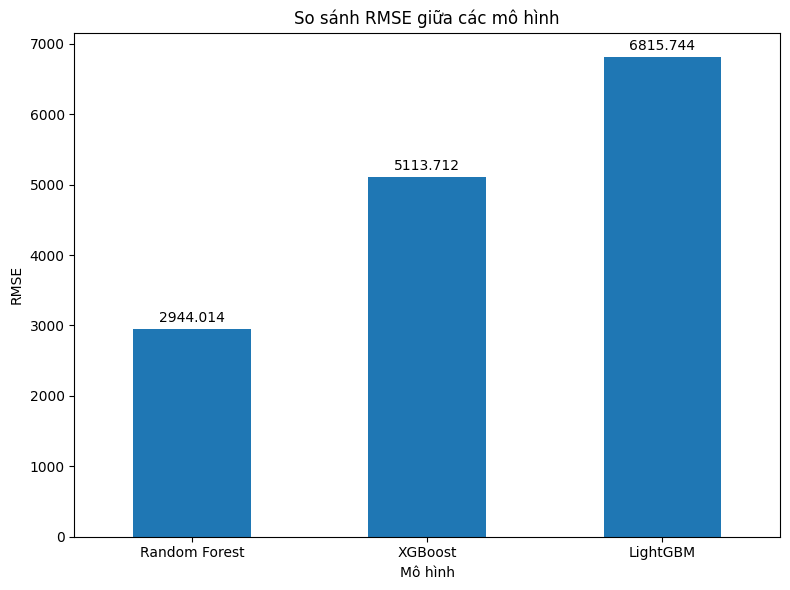

In [ ]:
# Vẽ biểu đồ
rmse_val = pd.Series({
    'Random Forest': rmse_rf,
    'XGBoost':      rmse_xgb,
    'LightGBM':     rmse_lgbm
})

fig, ax = plt.subplots(figsize=(8, 6))
rmse_val.plot.bar(ax=ax, rot=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

ax.set_title('So sánh RMSE giữa các mô hình')
ax.set_xlabel('Mô hình')
ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()


Chúng ta thấy hai mô hình Random Forest, XGBoost cho kết quả khá tốt khi chạy thử, nên chúng ta sẽ tunning bộ siêu tham số tốt nhất cho hai mô hình này để cải thiện kết quả

##5.2 Tìm bộ siêu tham số tốt nhất cho Random Forest, XGBoost

Do dữ liệu sử dụng khá lớn, nên chúng ta sẽ tìm các giá trị tốt nhất với từng siêu tham số bằng Validation Curves, sau đó thử nghiệm trên các bộ tham số khác nhau để tìm ra kết quả, lưu ý các biểu đồ Validation Curves vẽ theo sai số RMSE

Đối với mô hình Random Forest, chúng ta sẽ sử dụng Validation Curve, thử tìm các giá trị tốt nhất với từng siêu tham số, mục đích là để thu hẹp các khoảng giá trị siêu tham số cho kết quả tốt

In [ ]:
# Hàm fit với các siêu tham số khai báo
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_rmse = RMSE(y_train, model.predict(X_train))
    val_rmse = RMSE(y_test, model.predict(X_test))
    return train_rmse, val_rmse

In [ ]:
# Hàm vẽ biểu đồ
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(8, 6))
    plt.title('Validation curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    plt.grid(True)

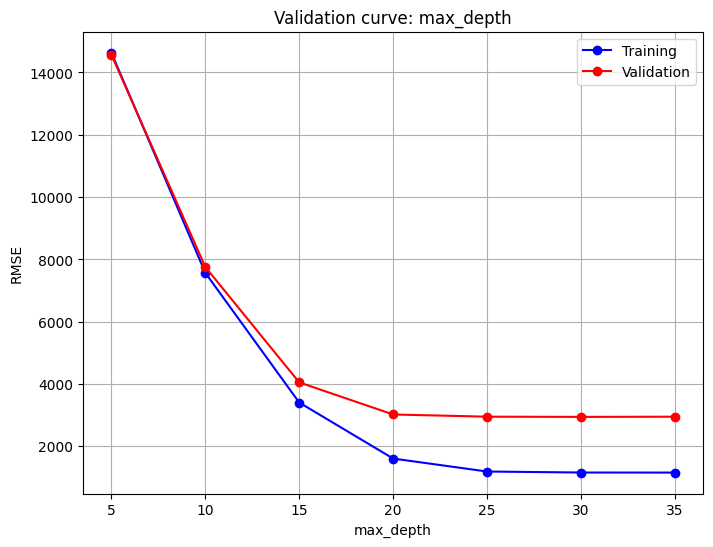

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

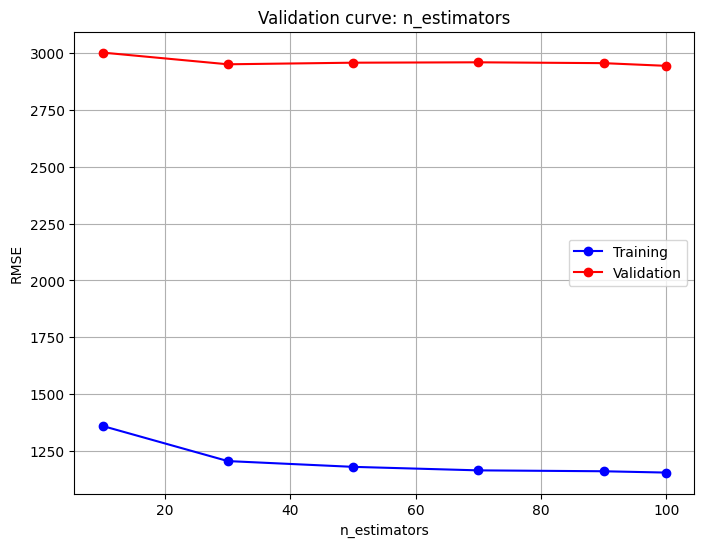

In [ ]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

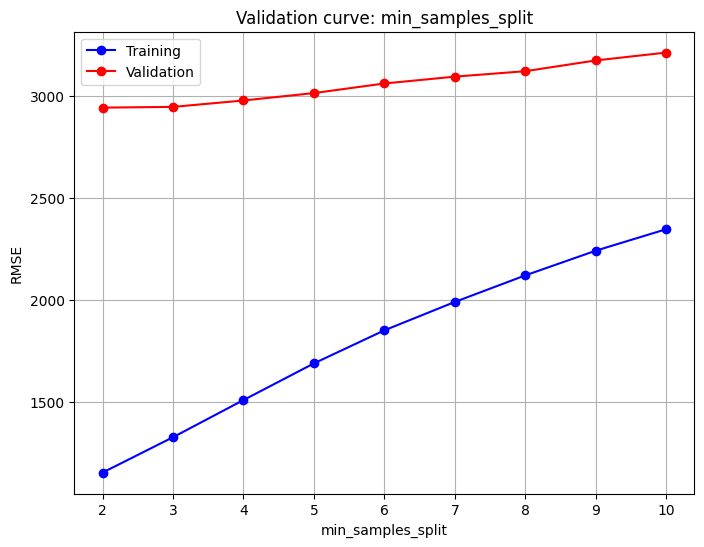

In [ ]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

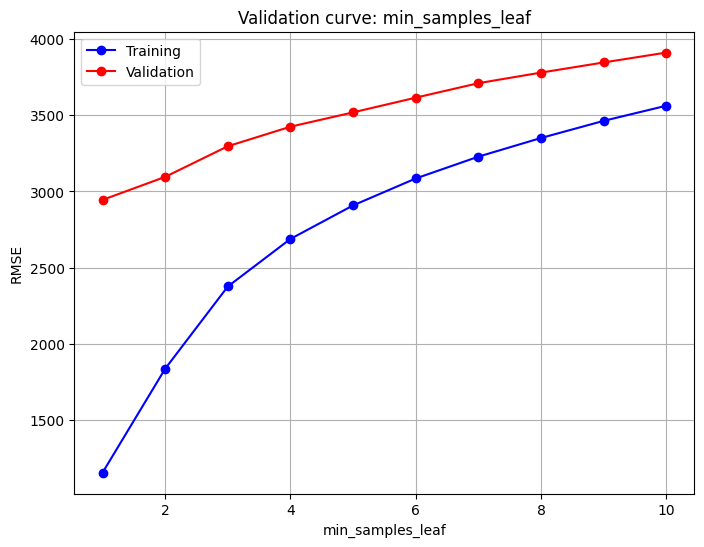

In [ ]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

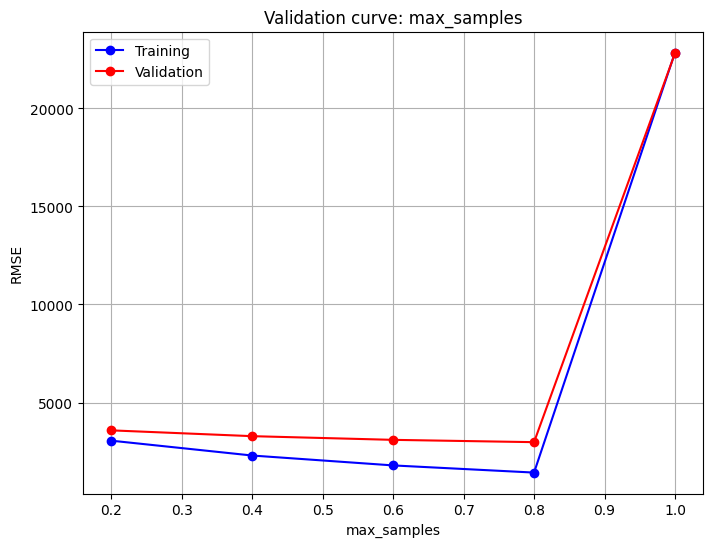

In [ ]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

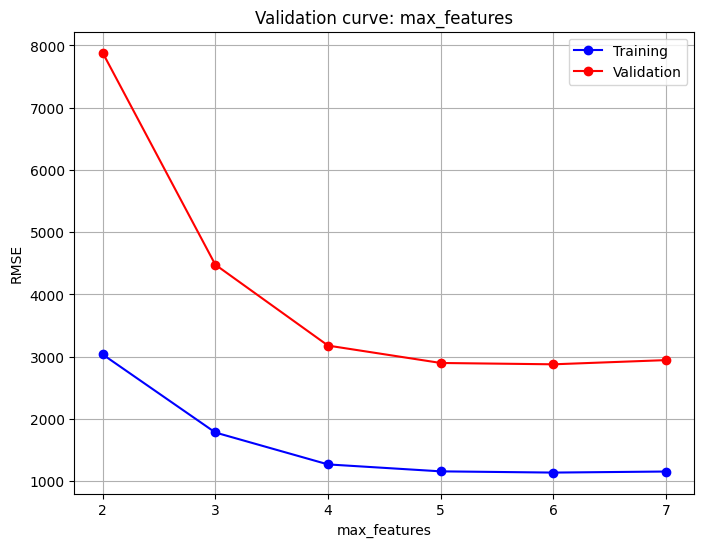

In [ ]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])

Ngoài việc dùng Validation Curves ra, nhóm có chạy thử các bộ siêu tham số khác bằng tay và Randomized Search và tìm ra được bộ tham số tốt nhất cho mô hình Random Forest
* max_depth = 30
* n_estimators = 130
* min_samples_split = 2
* min_samples_leaf = 1
* max_samples = 0.99999
* max_features = 6

In [ ]:
# Khởi tạo mô hình
rf = RandomForestRegressor(n_jobs=-1,
                           max_depth=30,
                           n_estimators=130,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_samples=0.99999,
                           max_features=6,
                           random_state=42
)


# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf.predict(X_test)

# Tính RMSE, MAE
mse_rf = MSE(y_test, y_pred_rf)
mae_rf  = MAE(y_test, y_pred_rf)
rmse_rf = RMSE(y_test, y_pred_rf)
wmae_rf = WMAE(X_test, y_test, y_pred_rf)

print('MSE (Random Forest sau khi tunning siêu tham số):', mse_rf)
print('MAE (Random Forest sau khi tunning siêu tham số):', mae_rf)
print('RMSE (Random Forest sau khi tunning siêu tham số)):', rmse_rf)
print('WMAE (Random Forest sau khi tunning siêu tham số):', wmae_rf)

MSE (Random Forest sau khi tunning siêu tham số): 8449648.918132724
MAE (Random Forest sau khi tunning siêu tham số): 1220.089352842517
RMSE (Random Forest sau khi tunning siêu tham số)): 2906.82798220547
WMAE (Random Forest sau khi tunning siêu tham số): 1352.0041684670311


Sau khi chọn bộ siêu tham số, sai số của mô hình Random Forest đã có cải thiện so với mô hình ban đầu

Tìm siêu tham số tối ưu với XGBoost cũng tương tự với Random Forest

In [ ]:
def test_params_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_rmse = RMSE(y_train, model.predict(X_train))
    val_rmse = RMSE(y_test, model.predict(X_test))
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_xgb(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(8, 6))
    plt.title('Validation curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    plt.grid(True)

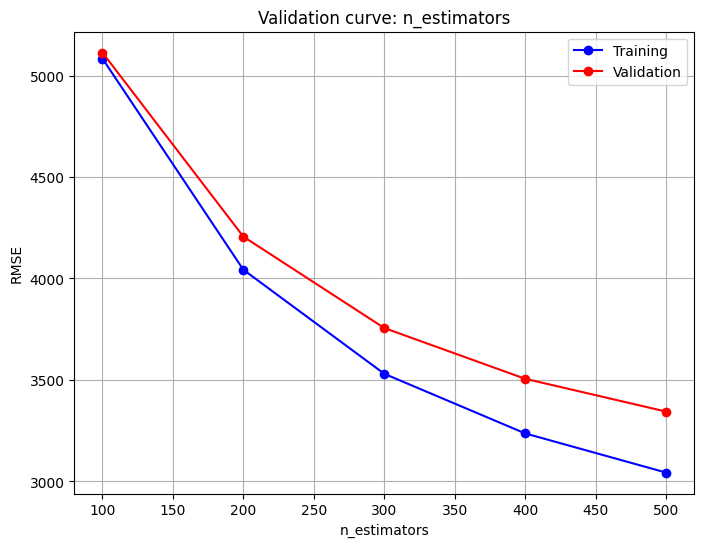

In [ ]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

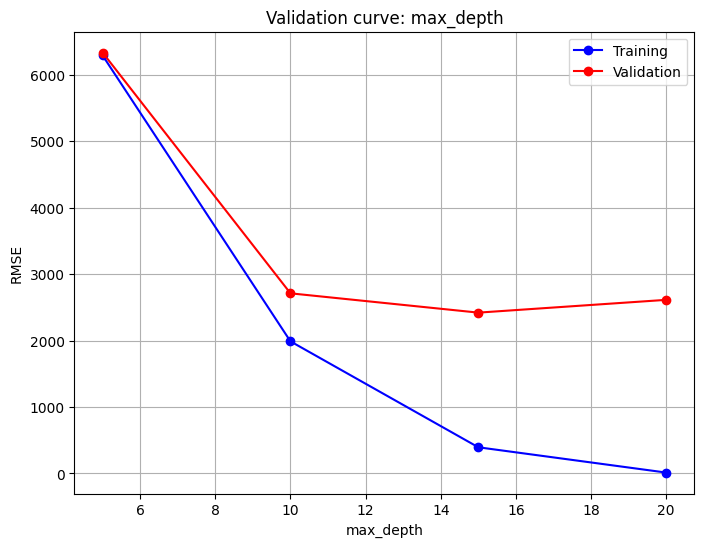

In [ ]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])

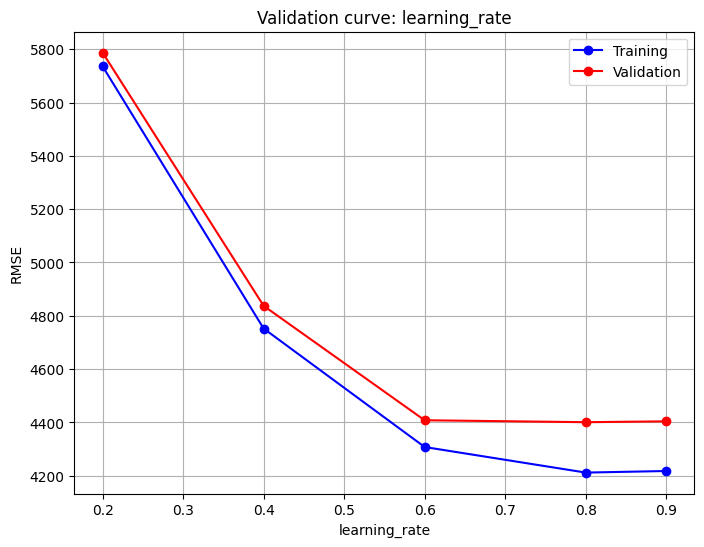

In [ ]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

Sau khi chọn được các giá trị tốt nhất của từng siêu tham số, chúng ta chạy thử các mô hình có các bộ siêu tham số khác nhau , từ đó chọn được các bộ siêu tham số dưới đây :
* n_estimators = 500
* max_depth = 20
* learning_rate = 0.8

In [ ]:
# Khởi tạo mô hình
xgb = XGBRegressor(random_state=42,
                   n_jobs=-1,
                   n_estimators=500,
                   max_depth=20,
                   learning_rate=0.8)

# Huấn luyện mô hình
xgb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_xgb = xgb.predict(X_test)

# Tính sai số
mse_xgb = MSE(y_test, y_pred_xgb)
mae_xgb  = MAE(y_test, y_pred_xgb)
rmse_xgb = RMSE(y_test, y_pred_xgb)
wmae_xgb = WMAE(X_test, y_test, y_pred_xgb)

print('MSE (XGBoost sau khi tunning siêu tham số):', mse_xgb)
print('MAE (XGBoost sau khi tunning siêu tham số):', mae_xgb)
print('RMSE (XGBoost sau khi tunning siêu tham số):', rmse_xgb)
print('WMAE (XGBoost sau khi tunning siêu tham số):', wmae_xgb)

MSE (XGBoost sau khi tunning siêu tham số): 8448900.796591874
MAE (XGBoost sau khi tunning siêu tham số): 1368.2878801791219
RMSE (XGBoost sau khi tunning siêu tham số): 2906.6992958666838
WMAE (XGBoost sau khi tunning siêu tham số): 1470.9677135210518


Sau khi chọn bộ siêu tham số, sai số của mô hình XGBoost đã cải thiện rất nhiều so với mô hình ban đầu

##5.3 Kết hợp hai mô hình

Sau khi tìm ra bộ siêu tham số tốt nhất cho mô hình Random Forest và XGBoost, chúng ta sẽ thử kết hợp kết quả của hai mô hình.  XGBoost có khả năng tìm ra các quan hệ phức tạp trong dữ liệu rất tốt, trong khi Random Forest ít bị ảnh hưởng bởi dữ liệu nhiễu. Việc kết hợp giúp mô hình vừa ổn định trước nhiễu, vừa học được các mẫu phức tạp, tăng tính chính xác và khả năng lệch giá trị so với việc chỉ dùng riêng mỗi mô hình

In [ ]:
y_pred_avg = y_pred_rf * 0.6 + y_pred_xgb * 0.4

mse_avg = MSE(y_test, y_pred_avg)
mae_avg  = MAE(y_test, y_pred_avg)
rmse_avg = RMSE(y_test, y_pred_avg)
wmae_avg = WMAE(X_test, y_test, y_pred_avg)

print('MSE (Weighted average RF + XGB):', mse_avg)
print('MAE (Weighted average RF + XGB):', mae_avg)
print('RMSE (Weighted average RF + XGB):', rmse_avg)
print('WMAE (Weighted average RF + XGB):', wmae_avg)

MSE (Weighted average RF + XGB): 7063884.802553882
MAE (Weighted average RF + XGB): 1173.9032533848679
RMSE (Weighted average RF + XGB): 2657.7969829454396
WMAE (Weighted average RF + XGB): 1282.5491533070376


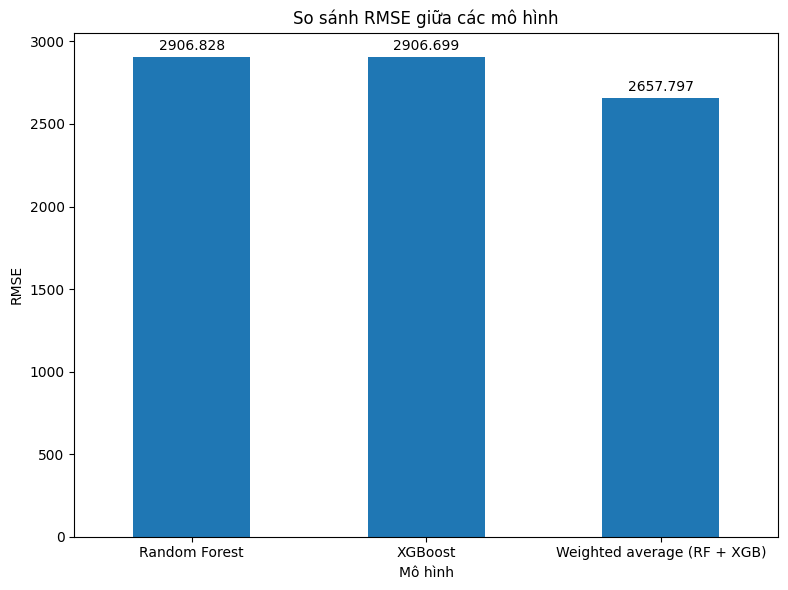

In [ ]:
# Vẽ biểu đồ
rmse_val = pd.Series({
    'Random Forest': rmse_rf,
    'XGBoost':      rmse_xgb,
    'Weighted average (RF + XGB)':     rmse_avg
})

fig, ax = plt.subplots(figsize=(8, 6))
rmse_val.plot.bar(ax=ax, rot=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

ax.set_title('So sánh RMSE giữa các mô hình')
ax.set_xlabel('Mô hình')
ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()


In [ ]:
# Cell này dùng để nộp trên Kaggle
test = df_test[features].copy()

y1 = rf.predict(test)
y2 = xgb.predict(test)
y_final = y1 * 0.6 + y2 * 0.4

submission_df = pd.DataFrame({
    'Id': (
        df_test['Store'].astype(str) + '_' +
        df_test['Dept'].astype(str)  + '_' +
        pd.to_datetime(df_test['Date']).dt.strftime('%Y-%m-%d')
    ),
    'Weekly_Sales': y_final
})

# Sort cho đúng thứ tự
submission_df = submission_df.sort_values('Id')

# Xuất file
submission_df.to_csv('submission.csv', index=False)